In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/AnIsAsPe/ClassificadorCancerEsofago/master/Datos/ClasesImagenes.csv", usecols=[1,2])


URLError: <urlopen error EOF occurred in violation of protocol (_ssl.c:1131)>

In [2]:
df

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0
...,...,...
5058,im_114_55.png,1
5059,im_7_55.png,1
5060,im_52_55.png,1
5061,im_10_55.png,1


In [3]:
df['class_number'].value_counts()

1    3594
0    1469
Name: class_number, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
from PIL import Image

#METHOD 1: Read files using file name from the csv and add corresponding 
#image in a pandas dataframe along with labels. 
#This requires lot of memory to hold all thousands of images. 
#Use datagen if you run into memory issues. 

path = 'data/CarpetaImagenes/'
image_path = os.listdir(path)
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
# image_path = {os.path.splitext(os.path.basename(x))[0]: x
#                      for x in glob(os.path.join('data/CarpetaImagenes/', '*', '*.jpg'))}

#Define the path and add as a new column
# df['path'] = df['image_id'].map(image_path.get)
# #Use the path to read images.
# df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

In [5]:
image_path

['im_143_6.png',
 'im_252_49.png',
 'im_295_29.png',
 'im_119_50.png',
 'im_257_42.png',
 'im_213_29.png',
 'im_22_22.png',
 'im_425_25.png',
 'im_338_49.png',
 'im_13_31.png',
 'im_174_6.png',
 'im_167_3.png',
 'im_62_34.png',
 'im_59_4.png',
 'im_46_43.png',
 'im_217_25.png',
 'im_36_29.png',
 'im_185_29.png',
 'im_122_49.png',
 'im_63_29.png',
 'im_3_4.png',
 'im_201_6.png',
 'im_119_2.png',
 'im_36_6.png',
 'im_60_40.png',
 'im_215_2.png',
 'im_188_25.png',
 'im_54_45.png',
 'im_144_6.png',
 'im_420_6.png',
 'im_113_42.png',
 'im_152_55.png',
 'im_117_25.png',
 'im_86_4.png',
 'im_21_1.png',
 'im_281_42.png',
 'im_21_41.png',
 'im_331_25.png',
 'im_53_31.png',
 'im_70_29.png',
 'im_183_25.png',
 'im_183_40.png',
 'im_10_18.png',
 'im_237_25.png',
 'im_40_45.png',
 'im_432_6.png',
 'im_214_34.png',
 'im_78_1.png',
 'im_183_34.png',
 'im_26_0.png',
 'im_35_45.png',
 'im_209_25.png',
 'im_185_6.png',
 'im_7_44.png',
 'im_171_29.png',
 'im_299_29.png',
 'im_8_31.png',
 'im_42_1.png',
 

In [5]:
import os

def get_path(image_id):
    image_path = image_id.split('.')[0] + '.png'
    base = 'data/CarpetaImagenes/'
    full_path = os.path.join(base, image_path)
    return full_path

In [6]:
df['image_path'] = df['image_filename'].apply(get_path)

In [7]:
df

,image_filename,class_number,image_path
0,im_4_0.png,0,data/CarpetaImagenes/im_4_0.png
1,im_21_0.png,0,data/CarpetaImagenes/im_21_0.png
2,im_9_0.png,0,data/CarpetaImagenes/im_9_0.png
3,im_8_0.png,0,data/CarpetaImagenes/im_8_0.png
4,im_15_0.png,0,data/CarpetaImagenes/im_15_0.png
...,...,...,...
5058,im_114_55.png,1,data/CarpetaImagenes/im_114_55.png
5059,im_7_55.png,1,data/CarpetaImagenes/im_7_55.png
5060,im_52_55.png,1,data/CarpetaImagenes/im_52_55.png
5061,im_10_55.png,1,data/CarpetaImagenes/im_10_55.png


In [10]:
test = plt.imread(df['image_path'].values[0])

In [11]:
test.shape

(260, 260, 4)

In [12]:
from PIL import Image

def extract_greyscale(image_path):
    image = np.asarray(Image.open(image_path).resize((260,260)).convert("L"))
    image_1d = image.flatten()
    return image_1d

In [8]:
import matplotlib.pyplot as plt

def extract_image(image_path):
    image = plt.imread(image_path)
    image_1d = image.flatten()
    return image_1d

In [13]:
df['image'] = df['image_path'].apply(extract_greyscale)

In [14]:
df

,image_filename,class_number,image_path,image
0,im_4_0.png,0,data/CarpetaImagenes/im_4_0.png,"[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3..."
1,im_21_0.png,0,data/CarpetaImagenes/im_21_0.png,"[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3..."
2,im_9_0.png,0,data/CarpetaImagenes/im_9_0.png,"[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3..."
3,im_8_0.png,0,data/CarpetaImagenes/im_8_0.png,"[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3..."
4,im_15_0.png,0,data/CarpetaImagenes/im_15_0.png,"[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3..."
...,...,...,...,...
5058,im_114_55.png,1,data/CarpetaImagenes/im_114_55.png,"[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3..."
5059,im_7_55.png,1,data/CarpetaImagenes/im_7_55.png,"[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3..."
5060,im_52_55.png,1,data/CarpetaImagenes/im_52_55.png,"[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3..."
5061,im_10_55.png,1,data/CarpetaImagenes/im_10_55.png,"[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3..."


In [15]:
df['image'].values[0].shape

(67600,)

### the following step takes lot of time

In [ ]:
image_data = pd.DataFrame(df["image"].tolist())

In [37]:
image_data.to_csv("image_data.csv")

In [3]:
!pip install scikit-image

     |████████████████████████████████| 13.4 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 43.4 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 2.5 MB/s eta 0:00:011
     |████████████████████████████████| 3.4 MB 380 kB/s eta 0:00:011
     |████████████████████████████████| 216 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 3.4 MB/s eta 0:00:011
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3


## start from here

In [1]:
import pandas as pd
from skimage import io
import numpy as np

In [2]:
df = pd.read_csv("data/ClasesImagenes.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0
...,...,...
5058,im_114_55.png,1
5059,im_7_55.png,1
5060,im_52_55.png,1
5061,im_10_55.png,1


In [4]:
base = 'data/CarpetaImagenes/'

In [5]:
from time import time

start = time()
img = df['image_filename'].apply(lambda x: io.imread(base + x, as_gray=True))
end = time()
print("Time required for converting the images to pixel array: ", end - start, "seconds")

Time required for converting the images to pixel array:  26.225706815719604 seconds


In [6]:
image = np.stack(img, axis=0)  # Take a sequence of arrays and stack them along 
                              # of a third axis to make a single array

In [7]:
image.shape

(5063, 260, 260)

In [8]:
image = image.reshape( 5063, -1)
image.shape

(5063, 67600)

In [9]:
max(image.max(axis=1))

0.8690803921568628

In [10]:
image

array([[0.08322275, 0.08322275, 0.08322275, ..., 0.08322275, 0.08322275,
        0.08322275],
       [0.08322275, 0.08322275, 0.08322275, ..., 0.08322275, 0.08322275,
        0.08322275],
       [0.08322275, 0.08322275, 0.08322275, ..., 0.08322275, 0.08322275,
        0.08322275],
       ...,
       [0.08322275, 0.08322275, 0.08322275, ..., 0.08322275, 0.08322275,
        0.08322275],
       [0.08322275, 0.08322275, 0.08322275, ..., 0.08322275, 0.08322275,
        0.08322275],
       [0.08322275, 0.08322275, 0.08322275, ..., 0.08322275, 0.08322275,
        0.08322275]])

In [12]:
image_label = df['class_number']

In [13]:
image_label

0       0
1       0
2       0
3       0
4       0
       ..
5058    1
5059    1
5060    1
5061    1
5062    1
Name: class_number, Length: 5063, dtype: int64

<AxesSubplot: >

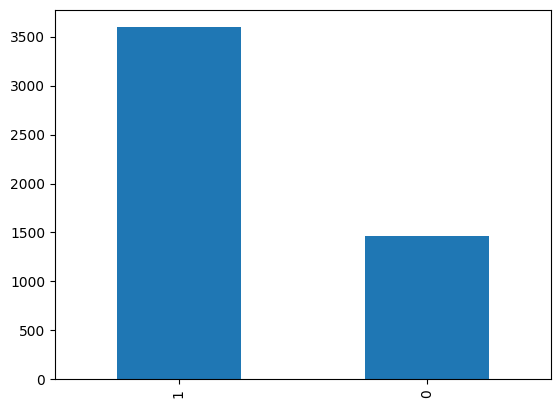

In [14]:
image_label.value_counts().plot(kind='bar')

## Doing PCA



In [20]:
from sklearn.decomposition import PCA

start = time()
pca = PCA(n_components = None)
pca_components = pca.fit_transform(image)
end = time()
print("time taken for doing PCA: ", end -start, "seconds")

time taken for doing PCA:  192.11580610275269 seconds


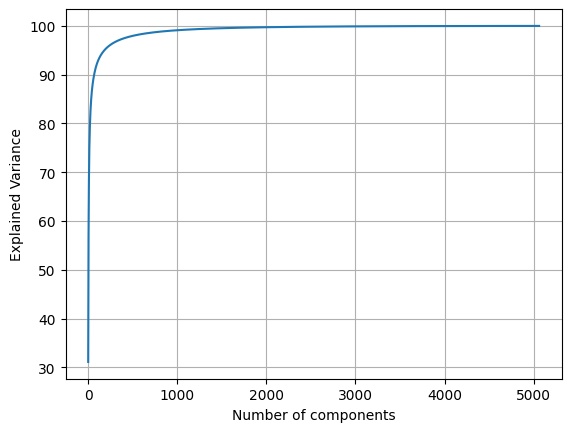

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

### using PCA for visualization

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

start = time()
scaler = StandardScaler()
image_transformed = scaler.fit_transform(image)
pca = PCA(n_components = 2)
pca2 = pca.fit_transform(image_transformed)
end = time()
print("time taken for doing PCA: ", end -start, "seconds")

time taken for doing PCA:  11.00803017616272 seconds


<AxesSubplot: >

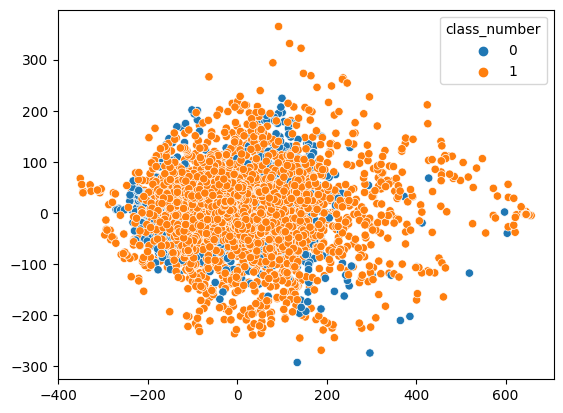

In [16]:
import seaborn as sns

sns.scatterplot(x=pca2[:,0], y=pca2[:,1], hue = image_label)

In [19]:
np.cumsum(pca.explained_variance_ratio_ * 100)[-1]

39.806424429340105

### using kernelPCA for visualization with rbf kernel

In [34]:
from sklearn.decomposition import KernelPCA

start = time()
scaler = StandardScaler()
image_transformed = scaler.fit_transform(image)
kernelPCA = KernelPCA(n_components = 2, random_state= 13, kernel='rbf')
kernel_pca = kernelPCA.fit_transform(image)
end = time()
print("time taken for doing PCA: ", end -start, "seconds")

time taken for doing PCA:  8.958718538284302 seconds


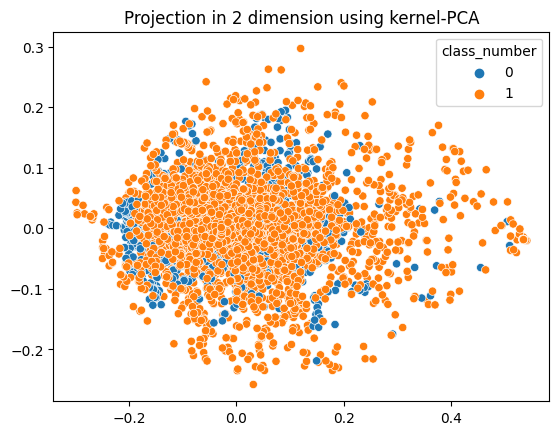

In [36]:
sns.scatterplot(x=kernel_pca[:,0], y=kernel_pca[:,1], hue = image_label)
plt.title("Projection in 2 dimension using kernel-PCA")
plt.show()

### using polynomial kernel

In [37]:
start = time()
scaler = StandardScaler()
image_transformed = scaler.fit_transform(image)
kernelPCA = KernelPCA(n_components = 2, random_state= 13, kernel='poly')
kernel_pca = kernelPCA.fit_transform(image)
end = time()
print("time taken for doing PCA: ", end -start, "seconds")

time taken for doing PCA:  9.239559412002563 seconds


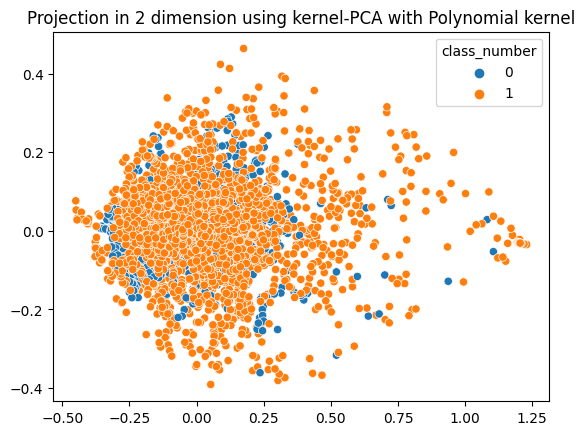

In [38]:
sns.scatterplot(x=kernel_pca[:,0], y=kernel_pca[:,1], hue = image_label)
plt.title("Projection in 2 dimension using kernel-PCA with Polynomial kernel")
plt.show()

### using sigmoid kernel

In [39]:
start = time()
scaler = StandardScaler()
image_transformed = scaler.fit_transform(image)
kernelPCA = KernelPCA(n_components = 2, random_state= 13, kernel='sigmoid')
kernel_pca = kernelPCA.fit_transform(image)
end = time()
print("time taken for doing PCA: ", end -start, "seconds")

time taken for doing PCA:  8.648306369781494 seconds


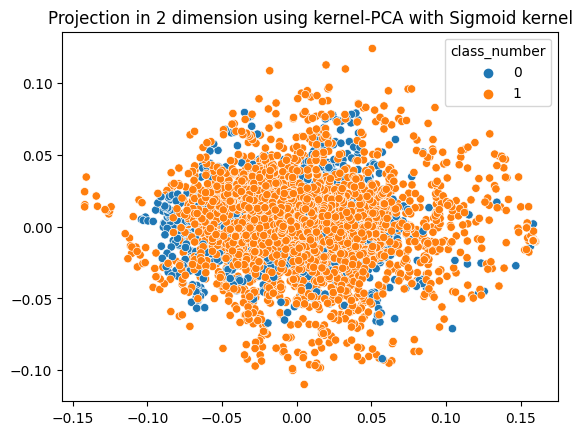

In [40]:
sns.scatterplot(x=kernel_pca[:,0], y=kernel_pca[:,1], hue = image_label)
plt.title("Projection in 2 dimension using kernel-PCA with Sigmoid kernel")
plt.show()

### using cosine kernel

In [41]:
start = time()
scaler = StandardScaler()
image_transformed = scaler.fit_transform(image)
kernelPCA = KernelPCA(n_components = 2, random_state= 13, kernel='cosine')
kernel_pca = kernelPCA.fit_transform(image)
end = time()
print("time taken for doing PCA: ", end -start, "seconds")

time taken for doing PCA:  9.774430513381958 seconds


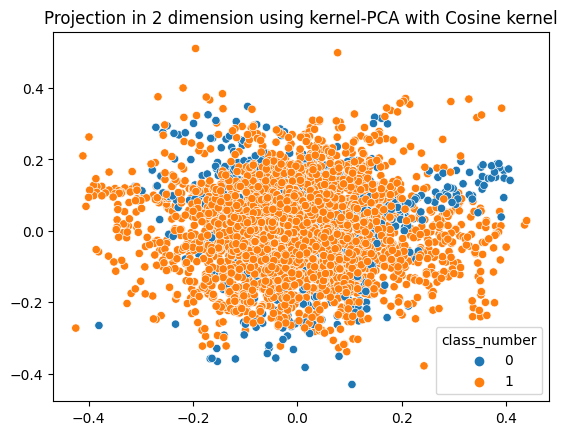

In [42]:
sns.scatterplot(x=kernel_pca[:,0], y=kernel_pca[:,1], hue = image_label)
plt.title("Projection in 2 dimension using kernel-PCA with Cosine kernel")
plt.show()

## using TSNE for visualization

In [23]:
from sklearn.manifold import TSNE

start = time()
tsne = TSNE(n_components = 2, perplexity = 50, random_state=0, n_iter=5000)

image_tsne = tsne.fit_transform(image)
end = time()
print("time taken for doing PCA: ", end -start, "seconds")

/home/nano-tech/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nano-tech/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


time taken for doing PCA:  48.889203786849976 seconds


<AxesSubplot: >

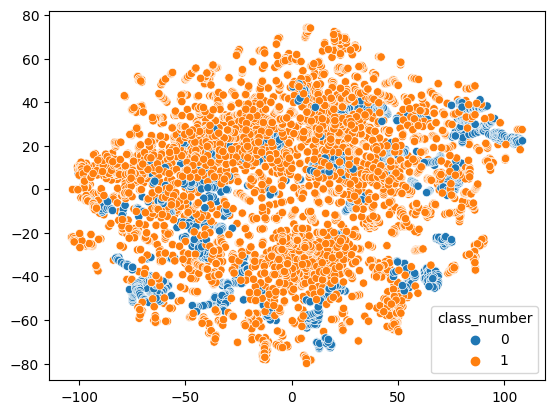

In [24]:
sns.scatterplot(x=image_tsne[:,0], y=image_tsne[:,1], hue = image_label)

## using umap for visualization

In [27]:
from umap import UMAP

2023-04-03 11:40:57.456482: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 11:40:57.665299: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/gromacs/lib
2023-04-03 11:40:57.665315: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-03 11:40:57.695155: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-03 11:40:58.418849:

In [28]:
start = time()
trans = UMAP(random_state=42)
image_umap = trans.fit_transform(image)
end = time()
print("time taken for doing UMAP: ", end -start, "seconds")

time taken for doing UMAP:  75.94869709014893 seconds


In [30]:
image_umap.shape

(5063, 2)

<AxesSubplot: >

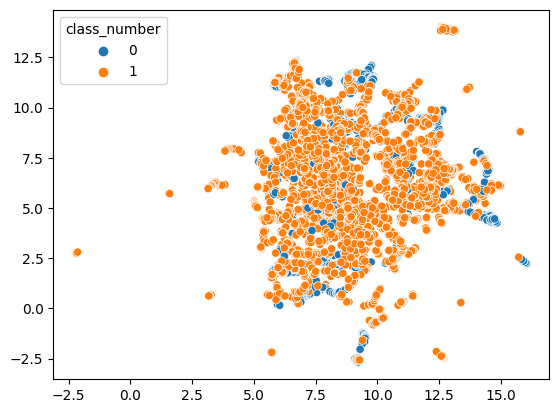

In [29]:
sns.scatterplot(x=image_umap[:,0], y=image_umap[:,1], hue = image_label)

## Using Factor Analysis 

In [45]:
from sklearn.decomposition import FactorAnalysis

start = time()
fa = FactorAnalysis(random_state = 13, n_components = 2)
image_fa = fa.fit_transform(image)
end = time()
print("time taken for doing LDA: ", end -start, "seconds")

time taken for doing LDA:  85.34138059616089 seconds


In [48]:
fa.get_covariance()

MemoryError: Unable to allocate 34.0 GiB for an array with shape (67600, 67600) and data type float64

In [47]:
image_fa.shape

(5063, 2)

<AxesSubplot: >

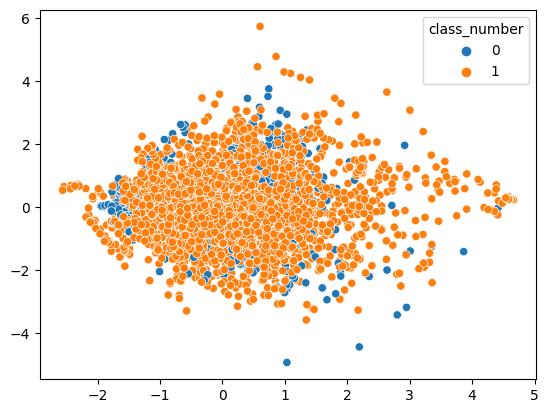

In [46]:
sns.scatterplot(x=image_fa[:,0], y=image_fa[:,1], hue = image_label)

## finding effect of Factor Analysis on model performance

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import FactorAnalysis

transformer = FactorAnalysis(random_state = 13, n_components = 500)
model = SVC(random_state=13)

pipe = make_pipeline(transformer, model)

start = time()
scores = cross_val_score(pipe, image, image_label, cv=4, scoring='accuracy')
end = time()
time_taken = end - start


In [16]:
scores

array([0.85466035, 0.93759874, 0.8135861 , 0.70355731])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from time import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

def model_trainer(image, image_label):
    components = np.arange(400, 2001, 100)
    models = {'Logistic Regression':LogisticRegression(max_iter=10000, random_state=13),
         'Random Forrest': RandomForestClassifier(random_state=13),
             'SVC': SVC(random_state=13),
             'KMeans Clustering':KMeans(n_clusters=2, random_state=13),
             'KNN': KNeighborsClassifier(n_jobs=-1),
              'adaboost': AdaBoostClassifier(random_state=13),
              'Gradient Boost': GradientBoostingClassifier(random_state=13)
             }
    
    num_components = []
    random_state = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    time_fa = []
    
    cross_val_score_components = []
    crossval_scores = []
    cross_val_model = []
    model_name = []
    time_required = []
    crossval_time = []
    
    total_models = 0
    
    for component in tqdm(components, total=len(components)):
        max_score = 0
        for i in range(10):
            rand_state = np.random.randint(low=1, high=500)

            X_train, X_test, y_train, y_test = train_test_split(image, image_label, test_size = 0.2, random_state = rand_state)
            
            start = time()
            fa = FactorAnalysis(random_state = 13, n_components = component)
            fa_train = fa.fit_transform(X_train)
            fa_test = fa.transform(X_test)
            end = time()
            
            fa_time = end-start

            for i in range(len(list(models.keys()))):
                model = list(models.values())[i]
                
                start = time()
                model.fit(fa_train, y_train)
                end = time()
                time_taken = end - start
                y_pred = model.predict(fa_test)

                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)

                random_state.append(rand_state)
                accuracy_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                f1_list.append(f1)
                num_components.append(component)
                model_name.append(list(models.keys())[i])
                time_required.append(time_taken)
                time_fa.append(fa_time)
                
                total_models += 1
                print("Total models trained: ",total_models)
         
        for i in range(len(list(models.keys()))):
            scaler = StandardScaler()
            fa = FactorAnalysis(random_state = 13, n_components = component)
            model = list(models.values())[i]
            
            pipe = make_pipeline(scaler, fa, model)
            
            start = time()
            scores = cross_val_score(pipe, image, image_label, cv=5, scoring='accuracy')
            end = time()
            time_taken = end - start
               
            cross_val_score_components.append(component)
            crossval_scores.append(scores)
            cross_val_model.append(list(models.keys())[i])
            crossval_time.append(time_taken)
            
            total_models += 5
            print("Total models trained: ",total_models)
        
    dic = {'components':num_components,
           'model':model_name,
           'random_state':random_state,
           'accuracy':accuracy_list,
           'precision':precision_list,
           'recall':recall_list,
           'f1_score':f1_list,
           'time_model':time_required,
           'time_fa': time_fa
          }
    
    crossval_params = {'components': cross_val_score_components,
                       'model':cross_val_model,
                      'accuracy':crossval_scores,
                       'time_taken':crossval_time,
                      } 
    
#     best_score = {'components': best_score_components,
#                   'random_state': best_states,
#                  'max_accuracy': best_score
#                  }
    
    all_rstate_df = pd.DataFrame(dic)
    crossval_df = pd.DataFrame(crossval_params)
#     best_score_df = pd.DataFrame(best_score)
    
    return all_rstate_df, crossval_df

In [ ]:
all_df, crossval_df = model_trainer(image, image_label)

all_df.to_csv("fa-random-state-data.csv")
crossval_df.to_csv("fa-crossval.csv")

  0%|                                                    | 0/17 [00:00<?, ?it/s]

Total models trained:  1
Total models trained:  2
Total models trained:  3
Total models trained:  4
Total models trained:  5
Total models trained:  6
Total models trained:  7
Total models trained:  8
Total models trained:  9
Total models trained:  10
Total models trained:  11
Total models trained:  12
Total models trained:  13
Total models trained:  14
Total models trained:  15
Total models trained:  16
Total models trained:  17
Total models trained:  18
Total models trained:  19
Total models trained:  20
Total models trained:  21
Total models trained:  22
Total models trained:  23
Total models trained:  24
Total models trained:  25
Total models trained:  26
Total models trained:  27
Total models trained:  28
Total models trained:  29
Total models trained:  30
Total models trained:  31
Total models trained:  32
Total models trained:  33
Total models trained:  34
Total models trained:  35
Total models trained:  36
Total models trained:  37
Total models trained:  38
Total models trained:

  6%|██▏                                  | 1/17 [1:13:16<19:32:30, 4396.88s/it]

Total models trained:  105
Total models trained:  106
Total models trained:  107
Total models trained:  108
Total models trained:  109
Total models trained:  110
Total models trained:  111
Total models trained:  112
Total models trained:  113
Total models trained:  114
Total models trained:  115
Total models trained:  116
Total models trained:  117
Total models trained:  118
Total models trained:  119
Total models trained:  120
Total models trained:  121
Total models trained:  122
Total models trained:  123
Total models trained:  124
Total models trained:  125
Total models trained:  126
Total models trained:  127
Total models trained:  128
Total models trained:  129
Total models trained:  130
Total models trained:  131
Total models trained:  132
Total models trained:  133
Total models trained:  134
Total models trained:  135
Total models trained:  136
Total models trained:  137
Total models trained:  138
Total models trained:  139
Total models trained:  140
Total models trained:  141
T

 12%|████▎                                | 2/17 [2:40:23<20:21:18, 4885.21s/it]

Total models trained:  210
Total models trained:  211
Total models trained:  212
Total models trained:  213
Total models trained:  214
Total models trained:  215
Total models trained:  216
Total models trained:  217
Total models trained:  218
Total models trained:  219
Total models trained:  220
Total models trained:  221
Total models trained:  222
Total models trained:  223
Total models trained:  224
Total models trained:  225
Total models trained:  226
Total models trained:  227
Total models trained:  228
Total models trained:  229
Total models trained:  230
Total models trained:  231
Total models trained:  232
Total models trained:  233
Total models trained:  234
Total models trained:  235
Total models trained:  236
Total models trained:  237
Total models trained:  238
Total models trained:  239
Total models trained:  240
Total models trained:  241
Total models trained:  242
Total models trained:  243
Total models trained:  244
Total models trained:  245
Total models trained:  246
T

 18%|██████▌                              | 3/17 [4:25:38<21:32:09, 5537.85s/it]

Total models trained:  315
Total models trained:  316
Total models trained:  317
Total models trained:  318
Total models trained:  319
Total models trained:  320
Total models trained:  321
Total models trained:  322
Total models trained:  323
Total models trained:  324
Total models trained:  325
Total models trained:  326
Total models trained:  327
Total models trained:  328
Total models trained:  329
Total models trained:  330
Total models trained:  331
Total models trained:  332
Total models trained:  333
Total models trained:  334
Total models trained:  335
Total models trained:  336
Total models trained:  337
Total models trained:  338
Total models trained:  339
Total models trained:  340
Total models trained:  341
Total models trained:  342
Total models trained:  343
Total models trained:  344
Total models trained:  345
Total models trained:  346


/home/nano-tech/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Total models trained:  347
Total models trained:  348
Total models trained:  349
Total models trained:  350
Total models trained:  351
Total models trained:  352
Total models trained:  353


/home/nano-tech/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Total models trained:  354
Total models trained:  355
Total models trained:  356
Total models trained:  357
Total models trained:  358
Total models trained:  359
Total models trained:  360
Total models trained:  361
Total models trained:  362
Total models trained:  363
Total models trained:  364
Total models trained:  365
Total models trained:  366
Total models trained:  367
Total models trained:  368
Total models trained:  369
Total models trained:  370
Total models trained:  371
Total models trained:  372
Total models trained:  373
Total models trained:  374
Total models trained:  375
Total models trained:  376
Total models trained:  377
Total models trained:  378
Total models trained:  379
Total models trained:  380
Total models trained:  381
Total models trained:  382
Total models trained:  383
Total models trained:  384
Total models trained:  385
Total models trained:  390
Total models trained:  395
Total models trained:  400
Total models trained:  405
Total models trained:  410
T

 24%|████████▋                            | 4/17 [6:25:54<22:23:26, 6200.52s/it]

Total models trained:  420
Total models trained:  421
Total models trained:  422
Total models trained:  423
Total models trained:  424
Total models trained:  425
Total models trained:  426
Total models trained:  427
Total models trained:  428
Total models trained:  429
Total models trained:  430
Total models trained:  431
Total models trained:  432
Total models trained:  433
Total models trained:  434
Total models trained:  435
Total models trained:  436
Total models trained:  437
Total models trained:  438
Total models trained:  439
Total models trained:  440
Total models trained:  441
Total models trained:  442
Total models trained:  443
Total models trained:  444
Total models trained:  445
Total models trained:  446
Total models trained:  447
Total models trained:  448
Total models trained:  449
Total models trained:  450
Total models trained:  451
Total models trained:  452
Total models trained:  453
Total models trained:  454
Total models trained:  455
Total models trained:  456
T

## finding effect of LDA on model performance

In [80]:
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from time import time
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

crossval_scores = []
cross_val_model = []
crossval_time = []
total_models = 0

models = {'Logistic Regression':LogisticRegression(max_iter=1800, random_state=13),
         'Random Forrest': RandomForestClassifier(random_state=13),
             'SVC': SVC(random_state=13),
             'KMeans Clustering':KMeans(n_clusters=2, random_state=13),
             'KNN': KNeighborsClassifier(n_jobs=-1),
              'adaboost': AdaBoostClassifier(random_state=13),
              'Gradient Boost': GradientBoostingClassifier(random_state=13)
             }

for i in range(len(list(models.keys()))):
    
    transformer = LinearDiscriminantAnalysis()
    model = list(models.values())[i]
    
    pipe = make_pipeline(transformer, model)
    
    start = time()
    scores = cross_val_score(pipe, image, image_label, cv=5, scoring='accuracy')
    end = time()
    time_taken = end - start

    crossval_scores.append(scores)
    cross_val_model.append(list(models.keys())[i])
    crossval_time.append(time_taken)

    total_models += 5
    print("Total models trained: ",total_models)
    
dic = {'model_name': cross_val_model,
      'accuracy': crossval_scores,
      'time': crossval_time
      }

data = pd.DataFrame(dic)
data.to_csv("data/lda-crossval-using-pipe.csv")

Total models trained:  5
Total models trained:  10
Total models trained:  15
Total models trained:  20
Total models trained:  25
Total models trained:  30
Total models trained:  35


In [83]:
data

,model_name,accuracy,time
0,Logistic Regression,"[0.6525172754195459, 0.6594274432379073, 0.667...",716.334886
1,Random Forrest,"[0.6535044422507403, 0.3376110562685094, 0.665...",692.805814
2,SVC,"[0.6515301085883515, 0.3751233958538993, 0.372...",695.250763
3,KMeans Clustering,"[0.700888450148075, 0.4027640671273445, 0.5133...",725.522564
4,KNN,"[0.6544916090819348, 0.6544916090819348, 0.666...",724.796581
5,adaboost,"[0.6535044422507403, 0.3376110562685094, 0.665...",733.196196
6,Gradient Boost,"[0.6535044422507403, 0.3376110562685094, 0.665...",718.600066


In [85]:
data['mean'] = data['accuracy'].apply(lambda x: x.mean())

In [86]:
data

,model_name,accuracy,time,mean
0,Logistic Regression,"[0.6525172754195459, 0.6594274432379073, 0.667...",716.334886,0.597830
1,Random Forrest,"[0.6535044422507403, 0.3376110562685094, 0.665...",692.805814,0.500463
2,SVC,"[0.6515301085883515, 0.3751233958538993, 0.372...",695.250763,0.414348
3,KMeans Clustering,"[0.700888450148075, 0.4027640671273445, 0.5133...",725.522564,0.516874
4,KNN,"[0.6544916090819348, 0.6544916090819348, 0.666...",724.796581,0.597040
5,adaboost,"[0.6535044422507403, 0.3376110562685094, 0.665...",733.196196,0.500463
6,Gradient Boost,"[0.6535044422507403, 0.3376110562685094, 0.665...",718.600066,0.500463


In [21]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from time import time
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def model_trainer(image, image_label):
    models = {'Logistic Regression':LogisticRegression(max_iter=1800, random_state=13),
         'Random Forrest': RandomForestClassifier(random_state=13),
             'SVC': SVC(random_state=13),
             'KMeans Clustering':KMeans(n_clusters=2, random_state=13),
             'KNN': KNeighborsClassifier(n_jobs=-1),
              'adaboost': AdaBoostClassifier(random_state=13),
              'Gradient Boost': GradientBoostingClassifier(random_state=13)
             }
    
    random_state = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    time_lda = []
    
    crossval_scores = []
    cross_val_model = []
    model_name = []
    time_required = []
    crossval_time = []
    list5 = np.arange(0, 5, 1)
    total_models = 0
        
    for i in tqdm(list5, total=5):
        rand_state = np.random.randint(low=1, high=500)
        X_train, X_test, y_train, y_test = train_test_split(image, image_label, test_size = 0.2, random_state = rand_state)

        start = time()
        lda = LinearDiscriminantAnalysis()
        lda_train = lda.fit_transform(X_train, y_train)
        lda_test = lda.transform(X_test)
        end = time()

        lda_time = end-start

        for i in range(len(list(models.keys()))):
            model = list(models.values())[i]

            start = time()
            model.fit(lda_train, y_train)
            end = time()
            time_taken = end - start
            y_pred = model.predict(lda_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            random_state.append(rand_state)
            accuracy_list.append(accuracy)
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)

            model_name.append(list(models.keys())[i])
            time_required.append(time_taken)
            time_lda.append(lda_time)

            total_models += 1
            print("Total models trained: ",total_models)

    for i in range(len(list(models.keys()))):

        lda = LinearDiscriminantAnalysis()
        lda_train = lda.fit_transform(image, image_label)

        model = list(models.values())[i]

        start = time()
        scores = cross_val_score(model, lda_train, image_label, cv=5, scoring='accuracy')
        end = time()
        time_taken = end - start

        crossval_scores.append(scores)
        cross_val_model.append(list(models.keys())[i])
        crossval_time.append(time_taken)

        total_models += 5
        print("Total models trained: ",total_models)

                
    dic = {'model':model_name,
           'random_state':random_state,
           'accuracy':accuracy_list,
           'precision':precision_list,
           'recall':recall_list,
           'f1_score':f1_list,
           'time_model':time_required,
           'time_lda': time_lda
          }
    
    crossval_params = {'model':cross_val_model,
                      'accuracy':crossval_scores,
                       'time_taken':crossval_time,
                      } 
    
#     best_score = {'components': best_score_components,
#                   'random_state': best_states,
#                  'max_accuracy': best_score
#                  }
    
    all_rstate_df = pd.DataFrame(dic)
    crossval_df = pd.DataFrame(crossval_params)
#     best_score_df = pd.DataFrame(best_score)
    
    return all_rstate_df, crossval_df

In [22]:
all_data, crossval_data = model_trainer(image, image_label)
all_data.to_csv("data/lda5.csv")
crossval_data.to_csv("data/crossval_lda.csv")

  0%|                                                     | 0/5 [00:00<?, ?it/s]

Total models trained:  1
Total models trained:  2
Total models trained:  3
Total models trained:  4


 20%|████████▊                                   | 1/5 [02:13<08:53, 133.39s/it]

Total models trained:  5
Total models trained:  6
Total models trained:  7
Total models trained:  8
Total models trained:  9
Total models trained:  10
Total models trained:  11
Total models trained:  12
Total models trained:  13


 40%|█████████████████▌                          | 2/5 [04:27<06:40, 133.63s/it]

Total models trained:  14
Total models trained:  15
Total models trained:  16
Total models trained:  17
Total models trained:  18
Total models trained:  19
Total models trained:  20


 60%|██████████████████████████▍                 | 3/5 [06:46<04:32, 136.01s/it]

Total models trained:  21
Total models trained:  22
Total models trained:  23
Total models trained:  24
Total models trained:  25


 80%|███████████████████████████████████▏        | 4/5 [09:01<02:15, 135.95s/it]

Total models trained:  26
Total models trained:  27
Total models trained:  28
Total models trained:  29
Total models trained:  30
Total models trained:  31
Total models trained:  32
Total models trained:  33
Total models trained:  34


100%|████████████████████████████████████████████| 5/5 [11:35<00:00, 139.13s/it]

Total models trained:  35


Total models trained:  40
Total models trained:  45
Total models trained:  50
Total models trained:  55
Total models trained:  60
Total models trained:  65
Total models trained:  70


In [15]:
import pandas as pd

all_data = pd.read_csv("data/lda1/lda5.csv")

In [23]:
(0.607108 + 0.601185 + 0.704837 + 0.611056 + 0.669299) / 5

0.638697

In [16]:
all_data

,Unnamed: 0,model,random_state,accuracy,precision,recall,f1_score,time_model,time_lda
0,0,Logistic Regression,256,0.607108,0.816602,0.582645,0.680064,0.013349,132.529697
1,1,Random Forrest,256,0.351431,0.711656,0.159780,0.260967,0.156614,132.529697
2,2,SVC,256,0.345508,0.680000,0.163912,0.264151,0.002084,132.529697
3,3,KMeans Clustering,256,0.392892,0.613497,0.413223,0.493827,0.014508,132.529697
4,4,KNN,256,0.602172,0.822355,0.567493,0.671557,0.000979,132.529697
5,5,adaboost,256,0.351431,0.711656,0.159780,0.260967,0.076795,132.529697
6,6,Gradient Boost,256,0.351431,0.711656,0.159780,0.260967,0.101939,132.529697
7,7,Logistic Regression,6,0.601185,0.812379,0.577717,0.675241,0.008619,132.908931
8,8,Random Forrest,6,0.355380,0.710227,0.171939,0.276855,0.163760,132.908931
9,9,SVC,6,0.354393,0.691099,0.181568,0.287582,0.002468,132.908931


In [25]:
data_acc = all_data.groupby('model')['accuracy'].mean()
data_precision = all_data.groupby('model')['precision'].mean()
data_recall = all_data.groupby('model')['recall'].mean()
data_f1 = all_data.groupby('model')['f1_score'].mean()
data_time = all_data.groupby('model')['time_model'].mean()

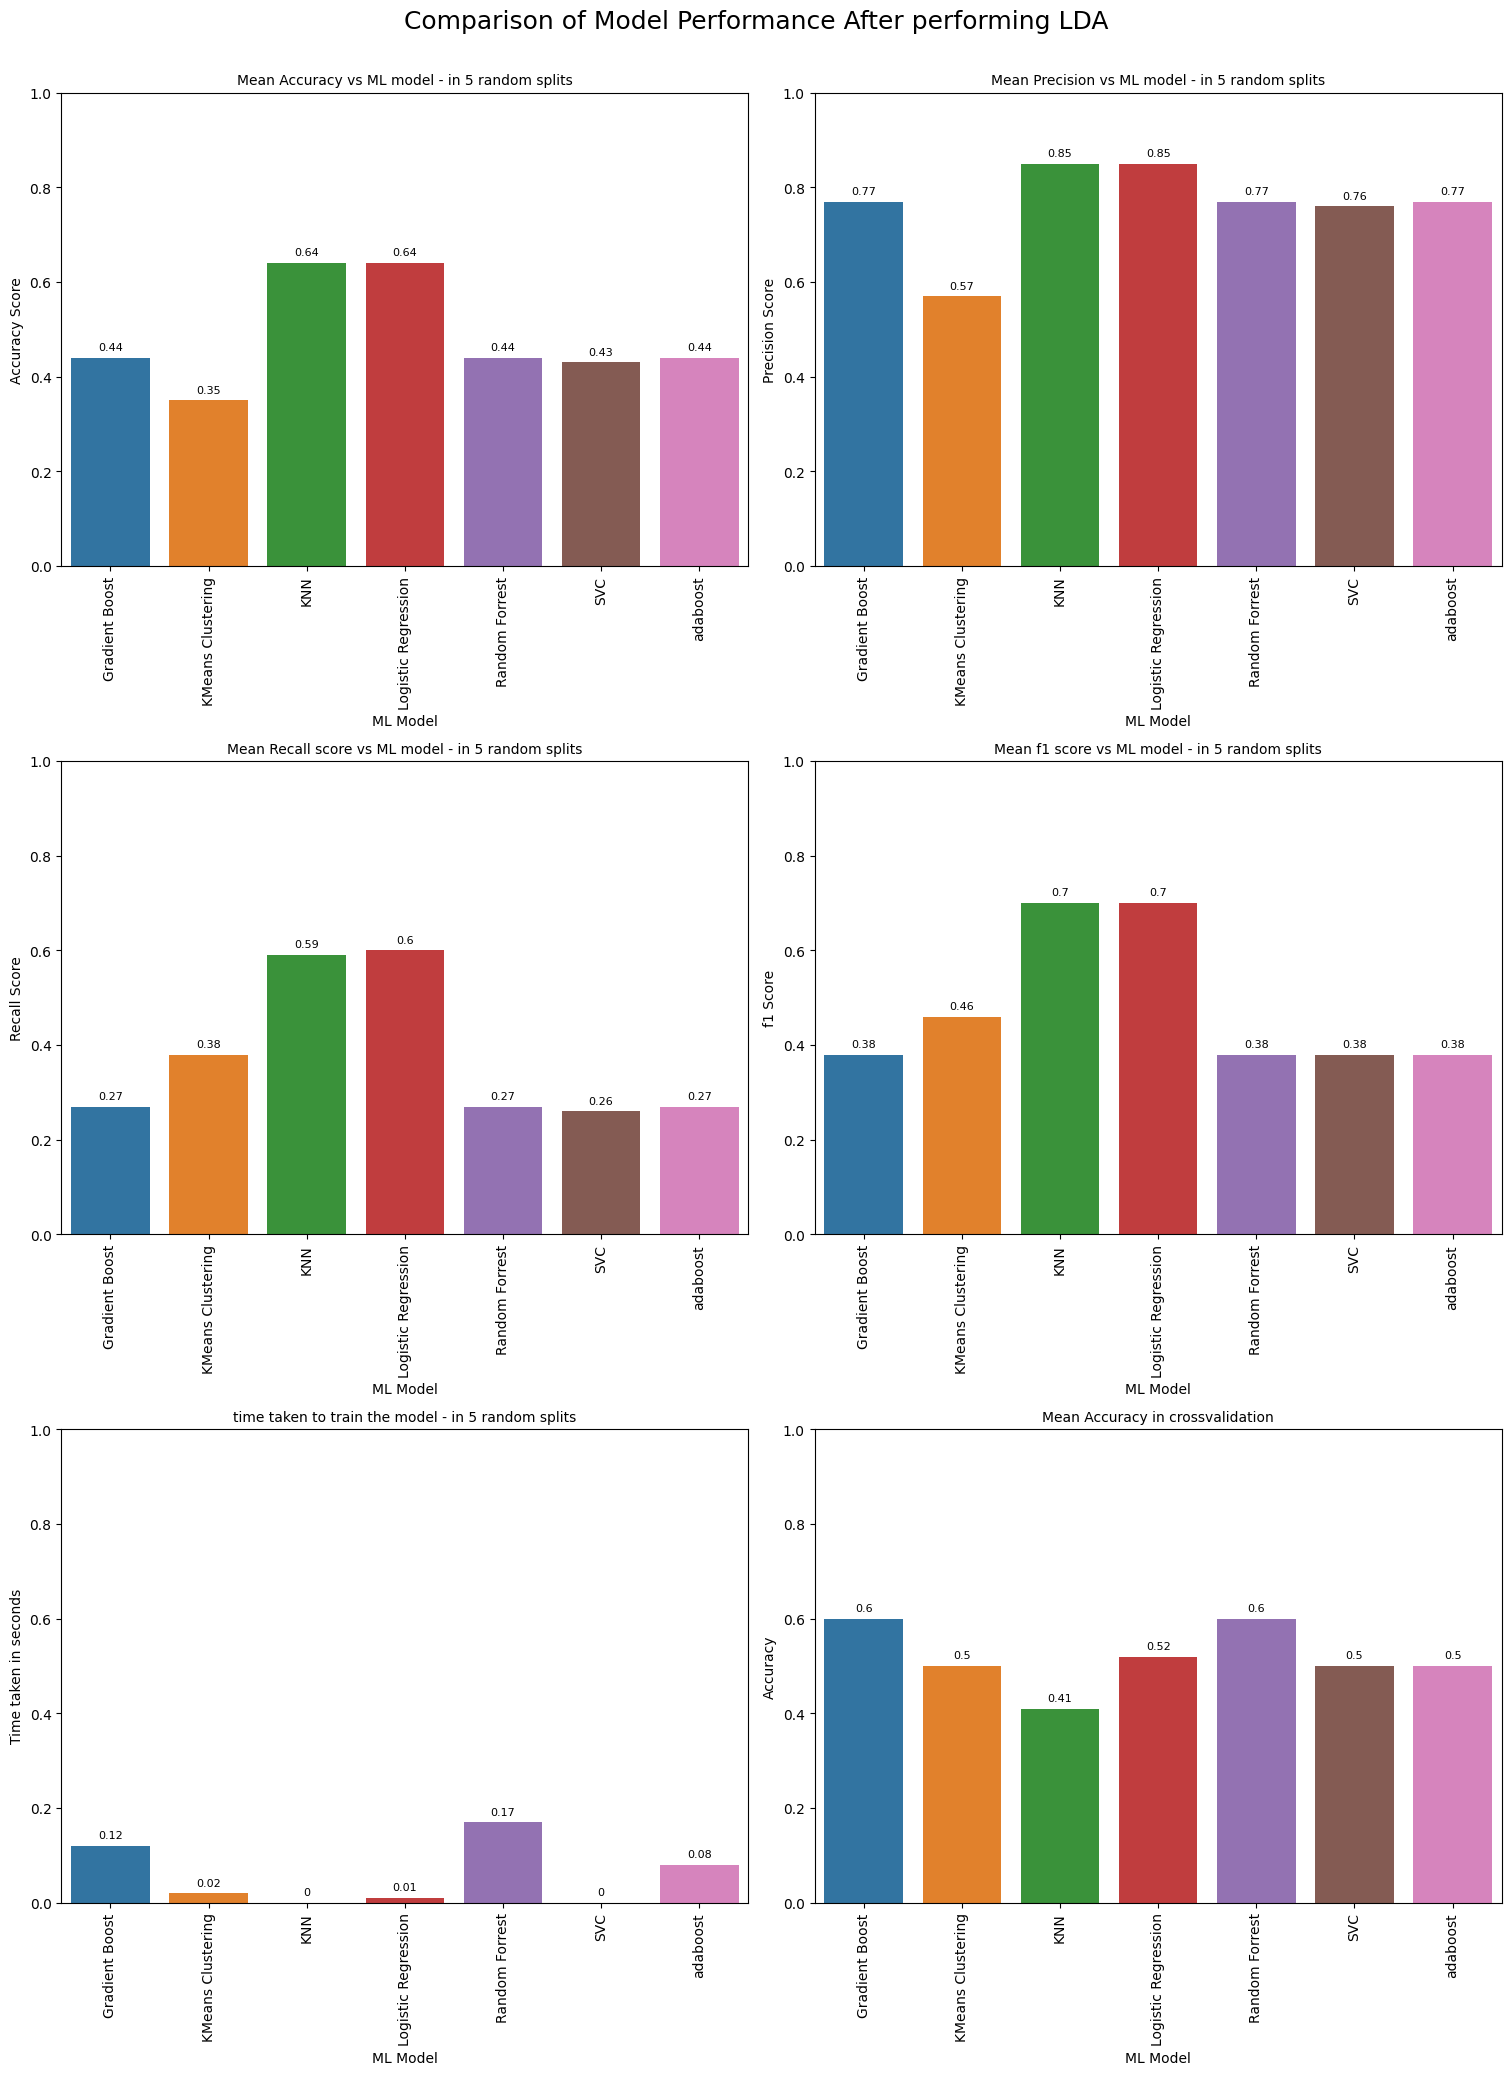

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3,2, figsize=(15, 20), constrained_layout=True)
fig.suptitle('Comparison of Model Performance After performing LDA', size = 18, y=1.03)

sns.barplot(x=data_acc.index, y = np.round(data_acc.values,2), ax = axes[0,0])
for bars_group in axes[0, 0].containers:
    axes[0, 0].bar_label(bars_group, padding=4, fontsize=8)
axes[0, 0].set_xticklabels(labels = data_acc.index, rotation=90)
axes[0, 0].set_title("Mean Accuracy vs ML model - in 5 random splits", size=10)
axes[0, 0].set_xlabel("ML Model")
axes[0, 0].set_ylabel("Accuracy Score")
axes[0, 0].set_ylim(0,1)

sns.barplot(x=data_precision.index, y = np.round(data_precision.values,2), ax = axes[0,1])
for bars_group in axes[0,1].containers:
    axes[0, 1].bar_label(bars_group, padding=4, fontsize=8)
axes[0, 1].set_xticklabels(labels = data_acc.index, rotation=90) 
axes[0, 1].set_title("Mean Precision vs ML model - in 5 random splits", size=10)
axes[0, 1].set_xlabel("ML Model")
axes[0, 1].set_ylabel("Precision Score")
axes[0, 1].set_ylim(0,1)

sns.barplot(x=data_recall.index, y = np.round(data_recall.values,2), ax = axes[1,0])
for bars_group in axes[1,0].containers:
    axes[1, 0].bar_label(bars_group, padding=4, fontsize=8)
axes[1, 0].set_xticklabels(labels = data_recall.index, rotation=90) 
axes[1, 0].set_title("Mean Recall score vs ML model - in 5 random splits", size=10)
axes[1, 0].set_xlabel("ML Model")
axes[1, 0].set_ylabel("Recall Score")
axes[1, 0].set_ylim(0,1)


sns.barplot(x=data_f1.index, y = np.round(data_f1.values,2), ax = axes[1,1])
for bars_group in axes[1,1].containers:
    axes[1, 1].bar_label(bars_group, padding=4, fontsize=8)
axes[1, 1].set_xticklabels(labels = data_f1.index, rotation=90) 
axes[1, 1].set_title("Mean f1 score vs ML model - in 5 random splits", size=10)
axes[1, 1].set_xlabel("ML Model")
axes[1, 1].set_ylabel("f1 Score")
axes[1, 1].set_ylim(0,1)

sns.barplot(x=data_time.index, y = np.round(data_time.values,2), ax = axes[2,0])
for bars_group in axes[2,0].containers:
    axes[2, 0].bar_label(bars_group, padding=4, fontsize=8)
axes[2, 0].set_xticklabels(labels = data_time.index, rotation=90) 
axes[2, 0].set_title("time taken to train the model - in 5 random splits", size=10)
axes[2, 0].set_xlabel("ML Model")
axes[2, 0].set_ylabel("Time taken in seconds")
axes[2, 0].set_ylim(0,1)

sns.barplot(x=data['model_name'].index, y = np.round(data['mean'].values,2), ax = axes[2,1])
for bars_group in axes[2,1].containers:
    axes[2, 1].bar_label(bars_group, padding=4, fontsize=8)
axes[2, 1].set_xticklabels(labels = data_time.index, rotation=90) 
axes[2, 1].set_title("Mean Accuracy in crossvalidation", size=10)
axes[2, 1].set_xlabel("ML Model")
axes[2, 1].set_ylabel("Accuracy")
axes[2, 1].set_ylim(0,1)

plt.show()

In [87]:
data['mean'].values

array([0.59783018, 0.50046315, 0.41434806, 0.51687411, 0.59704045,
       0.50046315, 0.50046315])

In [27]:
crossval_data['mean'] = crossval_data['accuracy'].apply(lambda x:x.mean())

In [28]:
crossval_data

,model,accuracy,time_taken,mean
0,Logistic Regression,"[0.9960513326752222, 1.0, 1.0, 1.0, 1.0]",0.048700,0.999210
1,Random Forrest,"[0.9960513326752222, 0.9990128331688055, 1.0, ...",0.684814,0.999013
2,SVC,"[0.9960513326752222, 1.0, 1.0, 1.0, 1.0]",0.037999,0.999210
3,KMeans Clustering,"[0.9960513326752222, 0.0, 0.0, 0.0, 0.0]",0.147424,0.199210
4,KNN,"[0.9960513326752222, 1.0, 1.0, 1.0, 1.0]",1.539032,0.999210
5,adaboost,"[0.9960513326752222, 0.9990128331688055, 1.0, ...",0.368015,0.999013
6,Gradient Boost,"[0.9960513326752222, 0.9990128331688055, 1.0, ...",0.582213,0.999013


In [33]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(lda2_transformed, image_label, test_size = 0.2, random_state = 13)

start = time()
kmeans = KMeans(random_state = 13, n_clusters=2)
kmeans.fit(X_train, y_train)
end = time()

print("time taken to train the model is {:.2f} seconds".format(end-start))

y_pred = kmeans.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KMeans model is {:.2f} %".format(accuracy*100))

time taken to train the model is 0.05 seconds
Accuracy of KMeans model is 0.10 %


In [29]:
sns.scatterplot(x=lda2_transformed[:,0], y=lda2_transformed[:,1], hue = image_label)

IndexError: index 1 is out of bounds for axis 1 with size 1

### trying with PCA components in range (500, 1500)

In [27]:
components = np.arange(500, 1501, 50)
components

array([ 500,  550,  600,  650,  700,  750,  800,  850,  900,  950, 1000,
       1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500])

In [29]:
image.min()

0.08322274509803922

In [30]:
image.max()

0.8690803921568628

In [126]:
np.random.randint(low=1, high=100)

25

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def model_trainer(image, image_label):
    components = np.arange(500, 1501, 100)
    num_components = []
    random_state = []
    accuracy_list = []
    best_score_components = []
    best_score = []
    best_states = []
    for component in components:
        max_score = 0
        for i in range(10):
            rand_state = np.random.randint(low=1, high=100)

            X_train, X_test, y_train, y_test = train_test_split(image, image_label, test_size = 0.2, random_state = rand_state)

            pca = PCA(n_components=component)
            pca_train = pca.fit_transform(X_train)
            pca_test = pca.transform(X_test)

            rf = RandomForestClassifier(random_state=13)
            rf.fit(pca_train, y_train)
            
            y_pred = rf.predict(pca_test)
            
            accuracy = accuracy_score(y_test, y_pred)
            
            random_state.append(rand_state)
            accuracy_list.append(accuracy)
            num_components.append(component)
            
            if accuracy > max_score:
                max_score = accuracy
                best_state = rand_state
            print(i)
            
        best_score_components.append(component)
        best_score.append(max_score)
        best_states.append(best_state)
        
    dic = {'components':num_components,
           'random_state':random_state,
           'accuracy':accuracy_list}
    
    best_score = {'components': best_score_components,
                  'random_state': best_states,
                 'max_accuracy': best_score
                 }
    
    all_rstate_df = pd.DataFrame(dic)
    best_score_df = pd.DataFrame(best_score)
    
    return all_rstate_df, best_score_df

In [14]:
from time import time

start = time()

all_df, best_score_df = model_trainer(image, image_label)

end = time()
print(f"time required: {0} seconds".format(np.round(end-start), 2))

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
time required: 0 seconds


In [55]:
for i in range(len(list(models.keys()))):
    print(list(models.keys())[i])

Logistic Regression
Random Forrest


In [286]:
!pip install xgboost

     |████████████████████████████████| 193.6 MB 2.8 MB/s eta 0:00:01     |███████████████████             | 115.3 MB 3.1 MB/s eta 0:00:26


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from time import time
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def model_trainer(image, image_label):
    components = np.arange(400, 2001, 100)
    models = {'Logistic Regression':LogisticRegression(max_iter=10000, random_state=13),
         'Random Forrest': RandomForestClassifier(random_state=13),
             'SVC': SVC(random_state=13),
             'KMeans Clustering':KMeans(n_clusters=2, random_state=13),
             'KNN': KNeighborsClassifier(n_jobs=-1),
              'adaboost': AdaBoostClassifier(random_state=13),
              'Gradient Boost': GradientBoostingClassifier(random_state=13)
             }
    
#     num_components = []
#     random_state = []
#     accuracy_list = []
#     precision_list = []
#     recall_list = []
#     f1_list = []
#     time_pca = []
    
    cross_val_score_components = []
    crossval_scores = []
    cross_val_model = []
    model_name = []
    time_required = []
    crossval_time = []
    
    total_models = 0
    
    for component in tqdm(components, total=len(components)):
#         max_score = 0
#         for i in range(10):
#             rand_state = np.random.randint(low=1, high=500)

#             X_train, X_test, y_train, y_test = train_test_split(image, image_label, test_size = 0.2, random_state = rand_state)
            
#             start = time()
#             pca = PCA(n_components=component)
#             pca_train = pca.fit_transform(X_train)
#             pca_test = pca.transform(X_test)
#             end = time()
            
#             pca_time = end-start

#             for i in range(len(list(models.keys()))):
#                 model = list(models.values())[i]
                
#                 start = time()
#                 model.fit(pca_train, y_train)
#                 end = time()
#                 time_taken = end - start
#                 y_pred = model.predict(pca_test)

#                 accuracy = accuracy_score(y_test, y_pred)
#                 precision = precision_score(y_test, y_pred)
#                 recall = recall_score(y_test, y_pred)
#                 f1 = f1_score(y_test, y_pred)

#                 random_state.append(rand_state)
#                 accuracy_list.append(accuracy)
#                 precision_list.append(precision)
#                 recall_list.append(recall)
#                 f1_list.append(f1)
#                 num_components.append(component)
#                 model_name.append(list(models.keys())[i])
#                 time_required.append(time_taken)
#                 time_pca.append(pca_time)
                
#                 total_models += 1
#                 print("Total models trained: ",total_models)
         
        for i in range(len(list(models.keys()))):
            scaler = StandardScaler()
            pca = PCA(n_components=component)
            model = list(models.values())[i]
            
            pipe = make_pipeline(scaler, pca, model)
            
            start = time()
            scores = cross_val_score(pipe, image, image_label, cv=5, scoring='accuracy')
            end = time()
            time_taken = end - start
               
            cross_val_score_components.append(component)
            crossval_scores.append(scores)
            cross_val_model.append(list(models.keys())[i])
            crossval_time.append(time_taken)
            
            total_models += 5
            print("Total models trained: ",total_models)
        
#     dic = {'components':num_components,
#            'model':model_name,
#            'random_state':random_state,
#            'accuracy':accuracy_list,
#            'precision':precision_list,
#            'recall':recall_list,
#            'f1_score':f1_list,
#            'time_model':time_required,
#            'time_pca': time_pca
#           }
    
    crossval_params = {'components': cross_val_score_components,
                       'model':cross_val_model,
                      'accuracy':crossval_scores,
                       'time_taken':crossval_time,
                      } 
    
#     best_score = {'components': best_score_components,
#                   'random_state': best_states,
#                  'max_accuracy': best_score
#                  }
    
#     all_rstate_df = pd.DataFrame(dic)
    crossval_df = pd.DataFrame(crossval_params)
#     best_score_df = pd.DataFrame(best_score)
    
    return crossval_df

In [106]:
image.shape

(5063, 67600)

In [107]:
crossval_data = model_trainer(image, image_label)
crossval_data.to_csv("pca-7models-pipe.csv")

  0%|                                                    | 0/17 [00:00<?, ?it/s]

Total models trained:  5
Total models trained:  10
Total models trained:  15
Total models trained:  20
Total models trained:  25
Total models trained:  30


  6%|██▎                                     | 1/17 [19:46<5:16:26, 1186.69s/it]

Total models trained:  35
Total models trained:  40
Total models trained:  45
Total models trained:  50
Total models trained:  55
Total models trained:  60
Total models trained:  65


 12%|████▋                                   | 2/17 [37:37<4:39:37, 1118.52s/it]

Total models trained:  70
Total models trained:  75
Total models trained:  80
Total models trained:  85
Total models trained:  90
Total models trained:  95
Total models trained:  100


 18%|███████                                 | 3/17 [57:55<4:31:38, 1164.17s/it]

Total models trained:  105
Total models trained:  110
Total models trained:  115
Total models trained:  120
Total models trained:  125
Total models trained:  130
Total models trained:  135


 24%|████████▉                             | 4/17 [1:20:27<4:28:15, 1238.12s/it]

Total models trained:  140
Total models trained:  145
Total models trained:  150
Total models trained:  155
Total models trained:  160
Total models trained:  165
Total models trained:  170


 29%|███████████▏                          | 5/17 [1:45:46<4:27:51, 1339.33s/it]

Total models trained:  175
Total models trained:  180
Total models trained:  185
Total models trained:  190
Total models trained:  195
Total models trained:  200
Total models trained:  205


 35%|█████████████▍                        | 6/17 [2:15:08<4:31:52, 1482.99s/it]

Total models trained:  210
Total models trained:  215
Total models trained:  220
Total models trained:  225
Total models trained:  230
Total models trained:  235
Total models trained:  240


 41%|███████████████▋                      | 7/17 [2:46:37<4:29:18, 1615.81s/it]

Total models trained:  245
Total models trained:  250
Total models trained:  255
Total models trained:  260
Total models trained:  265
Total models trained:  270
Total models trained:  275


 47%|█████████████████▉                    | 8/17 [3:21:21<4:24:44, 1764.97s/it]

Total models trained:  280
Total models trained:  285
Total models trained:  290
Total models trained:  295
Total models trained:  300
Total models trained:  305
Total models trained:  310


 53%|████████████████████                  | 9/17 [3:58:47<4:15:21, 1915.14s/it]

Total models trained:  315
Total models trained:  320
Total models trained:  325
Total models trained:  330
Total models trained:  335
Total models trained:  340
Total models trained:  345


 59%|█████████████████████▊               | 10/17 [4:40:43<4:05:06, 2100.91s/it]

Total models trained:  350
Total models trained:  355
Total models trained:  360
Total models trained:  365
Total models trained:  370
Total models trained:  375
Total models trained:  380


 65%|███████████████████████▉             | 11/17 [5:24:59<3:47:04, 2270.78s/it]

Total models trained:  385
Total models trained:  390
Total models trained:  395
Total models trained:  400
Total models trained:  405
Total models trained:  410
Total models trained:  415


 71%|██████████████████████████           | 12/17 [6:12:34<3:24:02, 2448.51s/it]

Total models trained:  420
Total models trained:  425
Total models trained:  430
Total models trained:  435
Total models trained:  440
Total models trained:  445
Total models trained:  450


 76%|████████████████████████████▎        | 13/17 [7:03:22<2:55:20, 2630.00s/it]

Total models trained:  455
Total models trained:  460
Total models trained:  465
Total models trained:  470
Total models trained:  475
Total models trained:  480
Total models trained:  485


 82%|██████████████████████████████▍      | 14/17 [7:58:52<2:22:04, 2841.53s/it]

Total models trained:  490
Total models trained:  495
Total models trained:  500
Total models trained:  505
Total models trained:  510
Total models trained:  515
Total models trained:  520


 88%|████████████████████████████████▋    | 15/17 [8:57:47<1:41:41, 3050.61s/it]

Total models trained:  525
Total models trained:  530
Total models trained:  535
Total models trained:  540
Total models trained:  545
Total models trained:  550
Total models trained:  555


 94%|███████████████████████████████████▊  | 16/17 [10:00:00<54:15, 3255.80s/it]

Total models trained:  560
Total models trained:  565
Total models trained:  570
Total models trained:  575
Total models trained:  580
Total models trained:  585
Total models trained:  590


100%|██████████████████████████████████████| 17/17 [11:05:41<00:00, 2349.47s/it]

Total models trained:  595


In [108]:
crossval_data

,components,model,accuracy,time_taken
0,400,Logistic Regression,"[0.7877591312931885, 0.8588351431391905, 0.778...",151.070813
1,400,Random Forrest,"[0.7838104639684107, 0.7917077986179665, 0.813...",156.014818
2,400,SVC,"[0.8529121421520237, 0.8736426456071076, 0.697...",142.549775
3,400,KMeans Clustering,"[0.6535044422507403, 0.5301085883514314, 0.606...",144.095699
4,400,KNN,"[0.5034550839091807, 0.4886475814412636, 0.504...",137.783095
...,...,...,...,...
114,2000,SVC,"[0.8647581441263573, 0.8854886475814413, 0.706...",440.765610
115,2000,KMeans Clustering,"[0.3464955577492596, 0.4698914116485686, 0.606...",421.740407
116,2000,KNN,"[0.48963474827245806, 0.4797630799605133, 0.49...",413.379020
117,2000,adaboost,"[0.8311944718657454, 0.8153998025666338, 0.847...",581.392223


In [298]:
all_data.to_csv("7models.csv")

In [323]:
lr_model_time = all_data[all_data['model'] == 'Logistic Regression'].groupby("components")['time_model'].mean()
rf_model_time = all_data[all_data['model'] == 'Random Forrest'].groupby("components")['time_model'].mean()
svc_model_time = all_data[all_data['model'] == 'SVC'].groupby("components")['time_model'].mean()
kmeans_model_time = all_data[all_data['model'] == 'KMeans Clustering'].groupby("components")['time_model'].mean()
knn_model_time = all_data[all_data['model'] == 'KNN'].groupby("components")['time_model'].mean()
gboost_model_time = all_data[all_data['model'] == 'Gradient Boost'].groupby("components")['time_model'].mean()
adaboost_model_time = all_data[all_data['model'] == 'adaboost'].groupby("components")['time_model'].mean()

In [322]:
lr_pca_time = all_data[all_data['model'] == 'Logistic Regression'].groupby("components")['time_pca'].mean()
rf_pca_time = all_data[all_data['model'] == 'Random Forrest'].groupby("components")['time_pca'].mean()
svc_pca_time = all_data[all_data['model'] == 'SVC'].groupby("components")['time_pca'].mean()
kmeans_pca_time = all_data[all_data['model'] == 'KMeans Clustering'].groupby("components")['time_pca'].mean()
knn_pca_time = all_data[all_data['model'] == 'KNN'].groupby("components")['time_pca'].mean()
gboost_pca_time = all_data[all_data['model'] == 'Gradient Boost'].groupby("components")['time_pca'].mean()
adaboost_pca_time = all_data[all_data['model'] == 'adaboost'].groupby("components")['time_pca'].mean()

In [327]:
lr_pca_time

components
400     24.502687
500     19.212555
600     21.536070
700     23.976111
800     26.879423
900     31.933134
1000    36.063503
1100    39.061547
1200    43.072981
1300    47.073906
1400    51.539204
1500    53.873336
1600    59.493572
1700    65.793390
1800    70.213132
1900    73.829797
2000    79.899288
Name: time_pca, dtype: float64

In [303]:
lr_accuracy_data = all_data[all_data['model'] == 'Logistic Regression'].groupby("components")['accuracy'].mean()
lr_precision_data = all_data[all_data['model'] == 'Logistic Regression'].groupby("components")['precision'].mean()
lr_recall_data = all_data[all_data['model'] == 'Logistic Regression'].groupby("components")['recall'].mean()
lr_f1score_data = all_data[all_data['model'] == 'Logistic Regression'].groupby("components")['f1_score'].mean()

In [304]:
rf_accuracy_data = all_data[all_data['model'] == 'Random Forrest'].groupby("components")['accuracy'].mean()
rf_precision_data = all_data[all_data['model'] == 'Random Forrest'].groupby("components")['precision'].mean()
rf_recall_data = all_data[all_data['model'] == 'Random Forrest'].groupby("components")['recall'].mean()
rf_f1score_data = all_data[all_data['model'] == 'Random Forrest'].groupby("components")['f1_score'].mean()

In [305]:
svc_accuracy_data = all_data[all_data['model'] == 'SVC'].groupby("components")['accuracy'].mean()
svc_precision_data = all_data[all_data['model'] == 'SVC'].groupby("components")['precision'].mean()
svc_recall_data = all_data[all_data['model'] == 'SVC'].groupby("components")['recall'].mean()
svc_f1score_data = all_data[all_data['model'] == 'SVC'].groupby("components")['f1_score'].mean()

In [306]:
kmeans_accuracy_data = all_data[all_data['model'] == 'KMeans Clustering'].groupby("components")['accuracy'].mean()
kmeans_precision_data = all_data[all_data['model'] == 'KMeans Clustering'].groupby("components")['precision'].mean()
kmeans_recall_data = all_data[all_data['model'] == 'KMeans Clustering'].groupby("components")['recall'].mean()
kmeans_f1score_data = all_data[all_data['model'] == 'KMeans Clustering'].groupby("components")['f1_score'].mean()

In [307]:
knn_accuracy_data = all_data[all_data['model'] == 'KNN'].groupby("components")['accuracy'].mean()
knn_precision_data = all_data[all_data['model'] == 'KNN'].groupby("components")['precision'].mean()
knn_recall_data = all_data[all_data['model'] == 'KNN'].groupby("components")['recall'].mean()
knn_f1score_data = all_data[all_data['model'] == 'KNN'].groupby("components")['f1_score'].mean()

In [308]:
gboost_accuracy_data = all_data[all_data['model'] == 'Gradient Boost'].groupby("components")['accuracy'].mean()
gboost_precision_data = all_data[all_data['model'] == 'Gradient Boost'].groupby("components")['precision'].mean()
gboost_recall_data = all_data[all_data['model'] == 'Gradient Boost'].groupby("components")['recall'].mean()
gboost_f1score_data = all_data[all_data['model'] == 'Gradient Boost'].groupby("components")['f1_score'].mean()

In [309]:
adaboost_accuracy_data = all_data[all_data['model'] == 'adaboost'].groupby("components")['accuracy'].mean()
adaboost_precision_data = all_data[all_data['model'] == 'adaboost'].groupby("components")['precision'].mean()
adaboost_recall_data = all_data[all_data['model'] == 'adaboost'].groupby("components")['recall'].mean()
adaboost_f1score_data = all_data[all_data['model'] == 'adaboost'].groupby("components")['f1_score'].mean()

In [227]:
rf_pca_time

components
400     25.000144
500     19.685774
600     23.170463
700     25.476859
800     28.061744
900     32.832989
1000    35.379872
1100    39.373009
1200    42.389207
1300    47.914308
1400    51.263345
1500    56.505801
1600    60.176412
1700    65.918181
1800    71.765692
1900    75.235323
2000    80.631364
Name: time_pca, dtype: float64

In [226]:
svc_pca_time

components
400     25.000144
500     19.685774
600     23.170463
700     25.476859
800     28.061744
900     32.832989
1000    35.379872
1100    39.373009
1200    42.389207
1300    47.914308
1400    51.263345
1500    56.505801
1600    60.176412
1700    65.918181
1800    71.765692
1900    75.235323
2000    80.631364
Name: time_pca, dtype: float64

In [282]:
all_data.to_csv("scores-lr-rf-svc-kmeans_400-2000.csv")

In [302]:
crossval_data.to_csv("7model_crossval.csv")

In [109]:
crossval_data['mean'] = crossval_data['accuracy'].apply(lambda x:x[0].mean())

In [110]:
crossval_data

,components,model,accuracy,time_taken,mean
0,400,Logistic Regression,"[0.7877591312931885, 0.8588351431391905, 0.778...",151.070813,0.787759
1,400,Random Forrest,"[0.7838104639684107, 0.7917077986179665, 0.813...",156.014818,0.783810
2,400,SVC,"[0.8529121421520237, 0.8736426456071076, 0.697...",142.549775,0.852912
3,400,KMeans Clustering,"[0.6535044422507403, 0.5301085883514314, 0.606...",144.095699,0.653504
4,400,KNN,"[0.5034550839091807, 0.4886475814412636, 0.504...",137.783095,0.503455
...,...,...,...,...,...
114,2000,SVC,"[0.8647581441263573, 0.8854886475814413, 0.706...",440.765610,0.864758
115,2000,KMeans Clustering,"[0.3464955577492596, 0.4698914116485686, 0.606...",421.740407,0.346496
116,2000,KNN,"[0.48963474827245806, 0.4797630799605133, 0.49...",413.379020,0.489635
117,2000,adaboost,"[0.8311944718657454, 0.8153998025666338, 0.847...",581.392223,0.831194


In [111]:
crossval_lr = crossval_data[crossval_data['model'] == 'Logistic Regression']['mean'].values
crossval_rf = crossval_data[crossval_data['model'] == 'Random Forrest']['mean'].values
crossval_svc = crossval_data[crossval_data['model'] == 'SVC']['mean'].values
crossval_kmeans = crossval_data[crossval_data['model'] == 'KMeans Clustering']['mean'].values
crossval_knn = crossval_data[crossval_data['model'] == 'KNN']['mean'].values
crossval_gboost = crossval_data[crossval_data['model'] == 'Gradient Boost']['mean'].values
crossval_adaboost = crossval_data[crossval_data['model'] == 'adaboost']['mean'].values

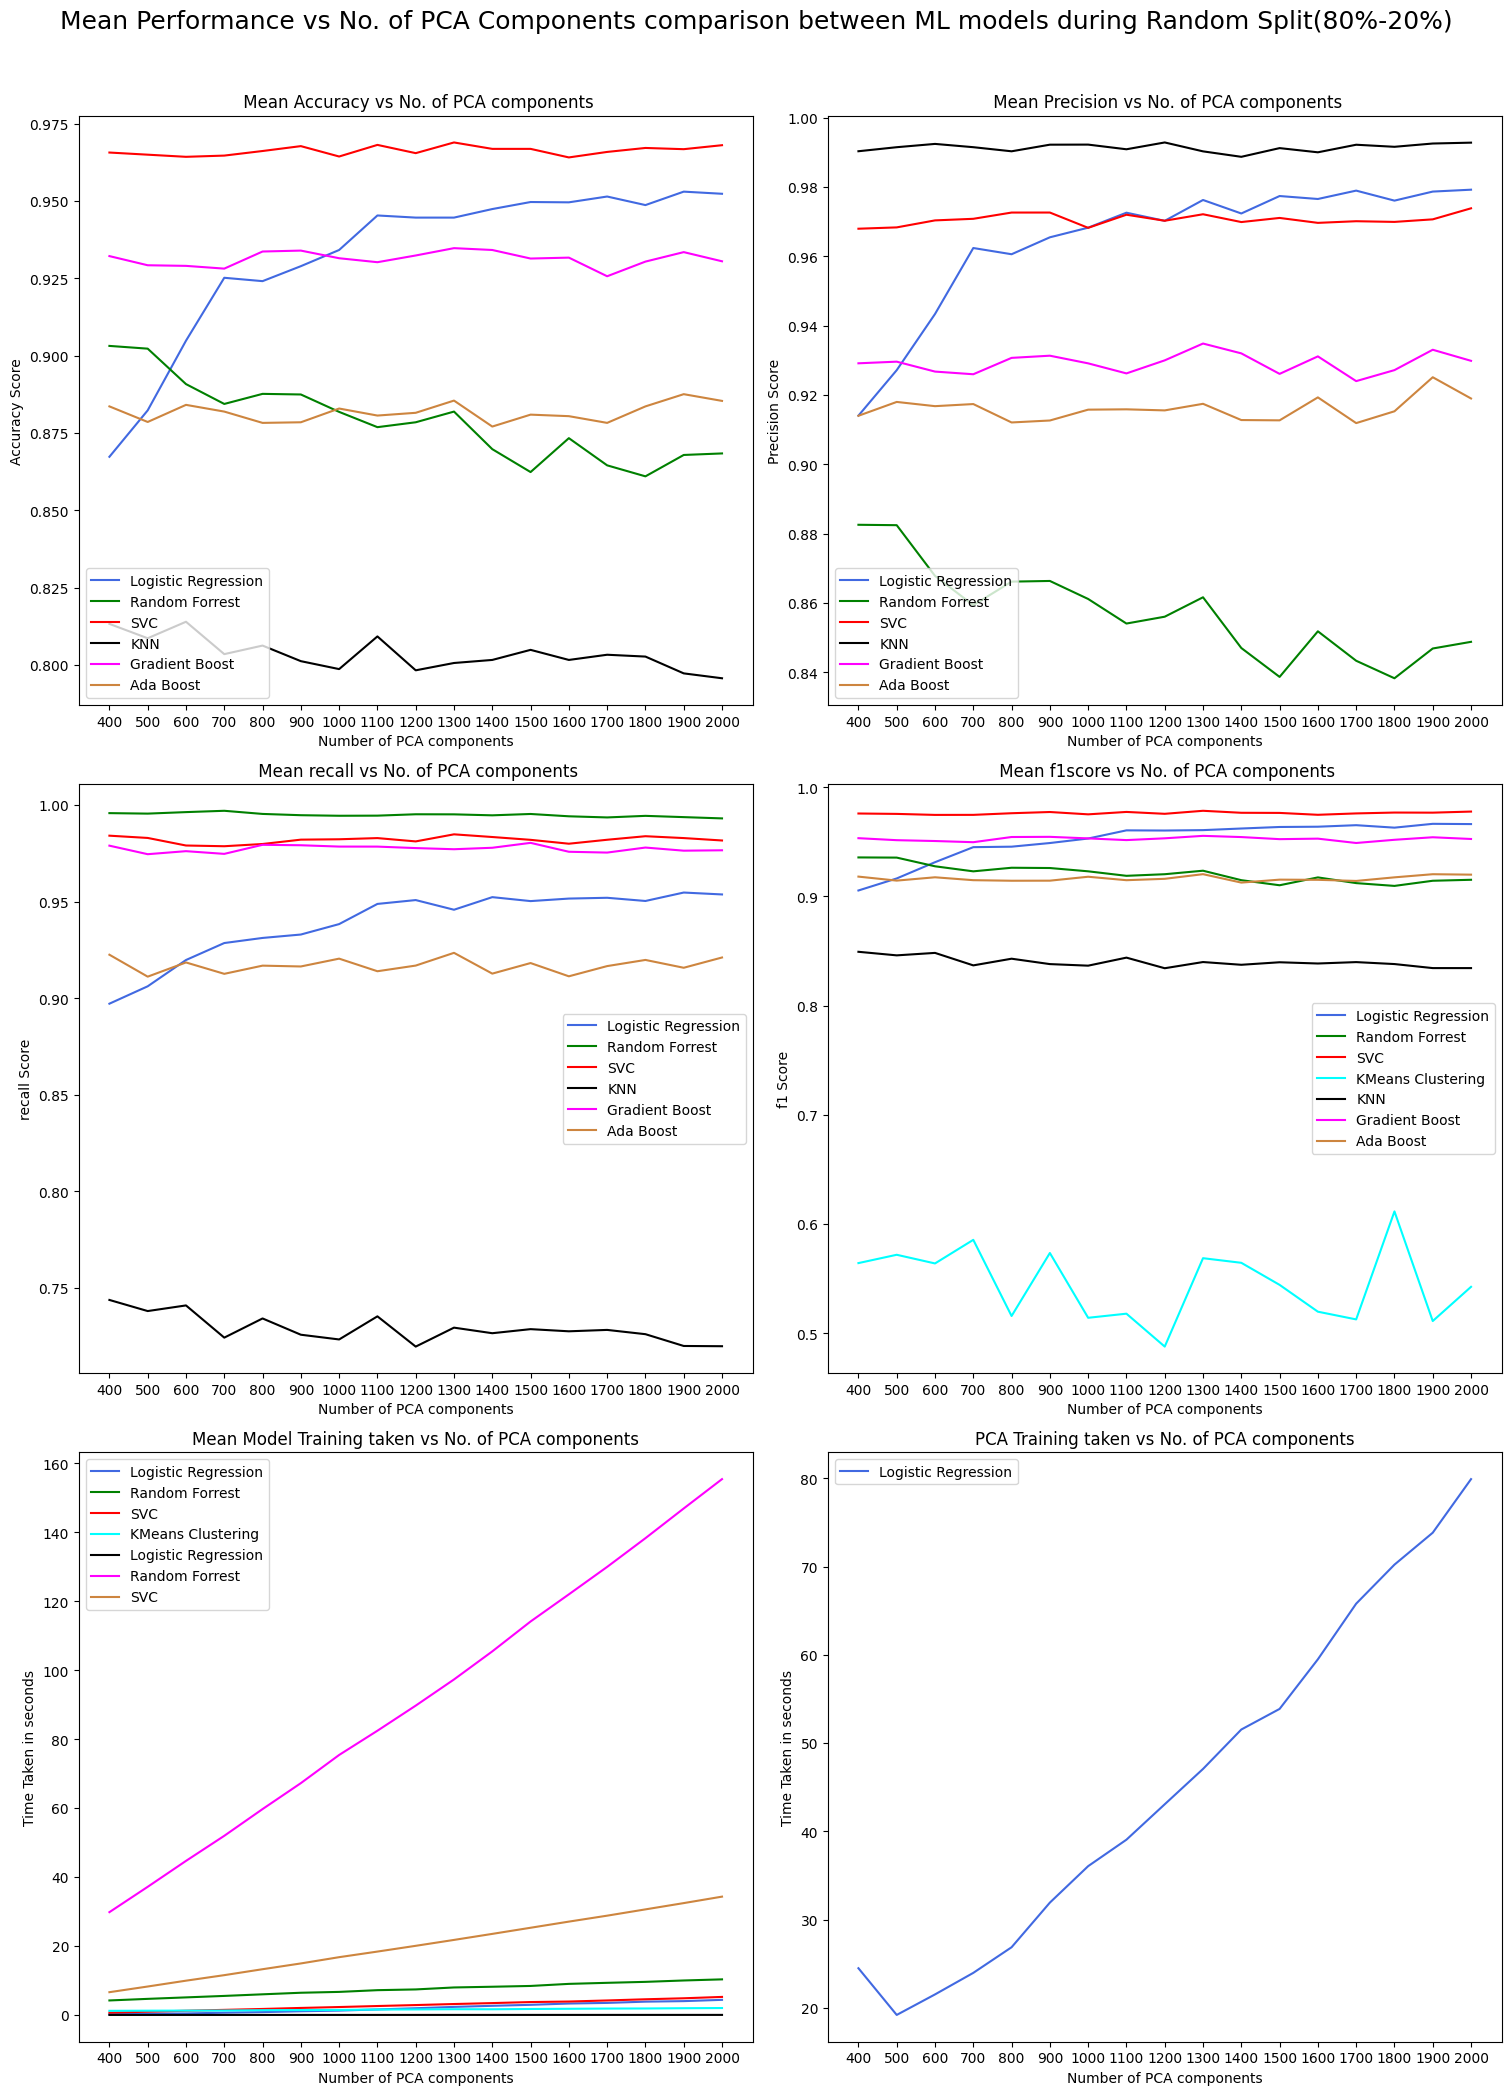

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3,2, figsize=(15, 20), constrained_layout=True)
fig.suptitle('Mean Performance vs No. of PCA Components comparison between ML models during Random Split(80%-20%)', y=1.04, size=18)

sns.lineplot(ax = axes[0,0], x=lr_accuracy_data.index, y=lr_accuracy_data.values, color='royalblue', label = 'Logistic Regression')
sns.lineplot(ax = axes[0,0],x=rf_accuracy_data.index, y=rf_accuracy_data.values, color='g', label='Random Forrest')
sns.lineplot(ax = axes[0,0],x=svc_accuracy_data.index, y=svc_accuracy_data.values, color='r', label='SVC')
# sns.lineplot(ax = axes[0,0],x=kmeans_accuracy_data.index, y=kmeans_accuracy_data.values, color='cyan', label='KMeans Clustering')
sns.lineplot(ax = axes[0,0],x=knn_accuracy_data.index, y=knn_accuracy_data.values, color='black', label='KNN')
sns.lineplot(ax = axes[0,0],x=gboost_accuracy_data.index, y=gboost_accuracy_data.values, color='magenta', label='Gradient Boost')
sns.lineplot(ax = axes[0,0],x=adaboost_accuracy_data.index, y=adaboost_accuracy_data.values, color='peru', label='Ada Boost')

axes[0,0].set_title(" Mean Accuracy vs No. of PCA components")
axes[0,0].set_xlabel("Number of PCA components")
axes[0,0].set_ylabel("Accuracy Score")
axes[0,0].set(xticks=lr_model_time.index)

sns.lineplot(ax = axes[0,1], x=lr_precision_data.index, y=lr_precision_data.values, color='royalblue', label = 'Logistic Regression')
sns.lineplot(ax = axes[0,1], x=rf_precision_data.index, y=rf_precision_data.values, color='g', label='Random Forrest')
sns.lineplot(ax = axes[0,1], x=svc_precision_data.index, y=svc_precision_data.values, color='r', label='SVC')
# sns.lineplot(ax = axes[0,1], x=kmeans_precision_data.index, y=kmeans_precision_data.values, color='cyan', label='KMeans Clustering')
sns.lineplot(ax = axes[0,1],x=knn_precision_data.index, y=knn_precision_data.values, color='black', label='KNN')
sns.lineplot(ax = axes[0,1],x=gboost_precision_data.index, y=gboost_precision_data.values, color='magenta', label='Gradient Boost')
sns.lineplot(ax = axes[0,1],x=adaboost_precision_data.index, y=adaboost_precision_data.values, color='peru', label='Ada Boost')
             
axes[0,1].set_title(" Mean Precision vs No. of PCA components")
axes[0,1].set_xlabel("Number of PCA components")
axes[0,1].set_ylabel("Precision Score")
axes[0,1].set(xticks=lr_model_time.index)

sns.lineplot(ax = axes[1,0], x=lr_recall_data.index, y=lr_recall_data.values, color='royalblue', label = 'Logistic Regression')
sns.lineplot(ax = axes[1,0], x=rf_recall_data.index, y=rf_recall_data.values, color='g', label='Random Forrest')
sns.lineplot(ax = axes[1,0], x=svc_recall_data.index, y=svc_recall_data.values, color='r', label='SVC')
# sns.lineplot(ax = axes[1,0], x=kmeans_recall_data.index, y=kmeans_recall_data.values, color='cyan', label='Kmeans Clustering')
sns.lineplot(ax = axes[1,0],x=knn_recall_data.index, y=knn_recall_data.values, color='black', label='KNN')
sns.lineplot(ax = axes[1,0],x=gboost_recall_data.index, y=gboost_recall_data.values, color='magenta', label='Gradient Boost')
sns.lineplot(ax = axes[1,0],x=adaboost_recall_data.index, y=adaboost_recall_data.values, color='peru', label='Ada Boost')
             
axes[1,0].set_title(" Mean recall vs No. of PCA components")
axes[1,0].set_xlabel("Number of PCA components")
axes[1,0].set_ylabel("recall Score")
axes[1,0].set(xticks=lr_model_time.index)

sns.lineplot(ax = axes[1,1], x=lr_f1score_data.index, y=lr_f1score_data.values, color='royalblue', label = 'Logistic Regression')
sns.lineplot(ax = axes[1,1], x=rf_f1score_data.index, y=rf_f1score_data.values, color='g', label='Random Forrest')
sns.lineplot(ax = axes[1,1], x=svc_f1score_data.index, y=svc_f1score_data.values, color='r', label='SVC')
sns.lineplot(ax = axes[1,1], x=kmeans_f1score_data.index, y=kmeans_f1score_data.values, color='cyan', label='KMeans Clustering')
sns.lineplot(ax = axes[1,1],x=knn_f1score_data.index, y=knn_f1score_data.values, color='black', label='KNN')
sns.lineplot(ax = axes[1,1],x=gboost_f1score_data.index, y=gboost_f1score_data.values, color='magenta', label='Gradient Boost')
sns.lineplot(ax = axes[1,1],x=adaboost_f1score_data.index, y=adaboost_f1score_data.values, color='peru', label='Ada Boost')

axes[1,1].set_title(" Mean f1score vs No. of PCA components")
axes[1,1].set_xlabel("Number of PCA components")
axes[1,1].set_ylabel("f1 Score")
axes[1,1].set(xticks=lr_model_time.index)


sns.lineplot(ax = axes[2,0], x=lr_model_time.index, y=lr_model_time.values, color='royalblue', label = 'Logistic Regression')
sns.lineplot(ax = axes[2,0], x=rf_model_time.index, y=rf_model_time.values, color='g', label='Random Forrest')
sns.lineplot(ax = axes[2,0], x=svc_model_time.index, y=svc_model_time.values, color='r', label = 'SVC')
sns.lineplot(ax = axes[2,0], x=kmeans_model_time.index, y=kmeans_model_time.values, color='cyan', label='KMeans Clustering')
sns.lineplot(ax = axes[2,0], x=knn_model_time.index, y=knn_model_time.values, color='black', label = 'Logistic Regression')
sns.lineplot(ax = axes[2,0], x=gboost_model_time.index, y=gboost_model_time.values, color='magenta', label='Random Forrest')
sns.lineplot(ax = axes[2,0], x=adaboost_model_time.index, y=adaboost_model_time.values, color='peru', label = 'SVC')
axes[2,0].set_title("Mean Model Training taken vs No. of PCA components")
axes[2,0].set_xlabel("Number of PCA components")
axes[2,0].set_ylabel("Time Taken in seconds")
axes[2,0].set(xticks=lr_model_time.index)

sns.lineplot(ax = axes[2,1], x=lr_pca_time.index, y=lr_pca_time.values, color='royalblue', label = 'Logistic Regression')
# sns.lineplot(ax = axes[2,1], x=rf_pca_time.index, y=rf_pca_time.values, color='g', label='Random Forrest')
# sns.lineplot(ax = axes[2,1], x=svc_pca_time.index, y=svc_pca_time.values, color='r', label = 'SVC')
# sns.lineplot(ax = axes[2,1], x=kmeans_pca_time.index, y=kmeans_pca_time.values, color='cyan', label='KMeans Clustering')
# sns.lineplot(ax = axes[2,1], x=knn_pca_time.index, y=knn_pca_time.values, color='black', label = 'Logistic Regression')
# sns.lineplot(ax = axes[2,1], x=gboost_pca_time.index, y=gboost_pca_time.values, color='magenta', label='Random Forrest')
# sns.lineplot(ax = axes[2,1], x=adaboost_pca_time.index, y=adaboost_pca_time.values, color='peru', label = 'SVC')
axes[2,1].set_title("PCA Training taken vs No. of PCA components")
axes[2,1].set_xlabel("Number of PCA components")
axes[2,1].set_ylabel("Time Taken in seconds")
axes[2,1].set(xticks=lr_model_time.index)
# plt.subplots_adjust(top=1)
# fig.tight_layout()

plt.show()


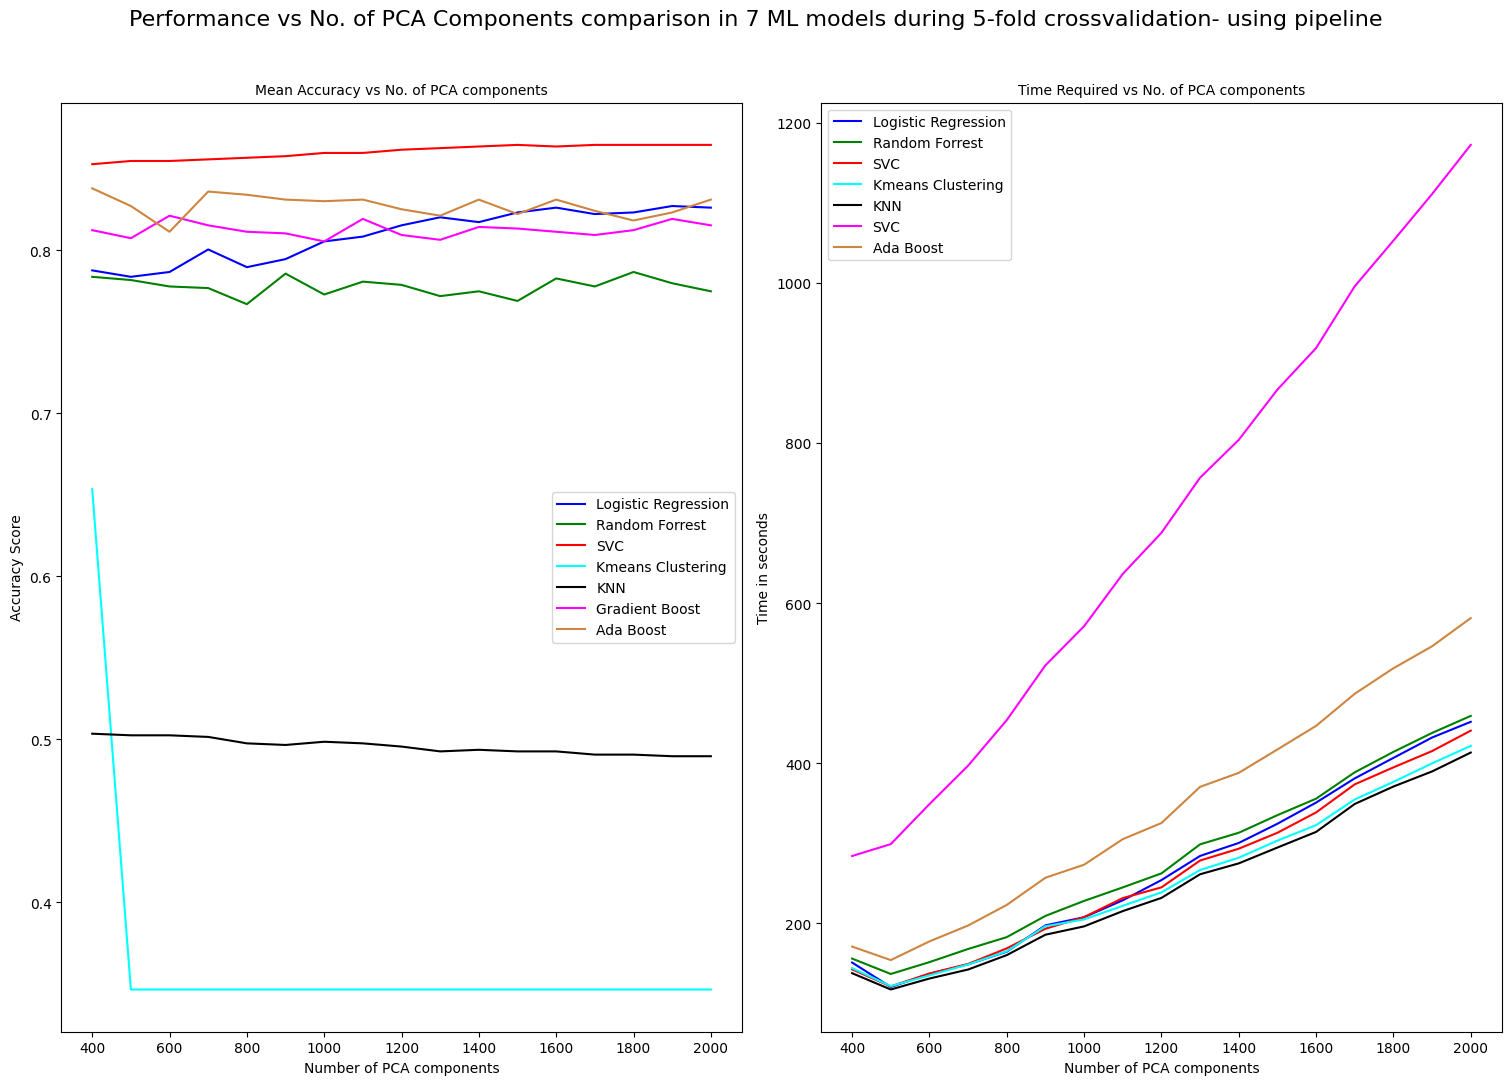

In [114]:
components = np.arange(400, 2001, 100)

fig, axes = plt.subplots(1,2, figsize=(15, 10), constrained_layout=True)
fig.suptitle('Performance vs No. of PCA Components comparison in 7 ML models during 5-fold crossvalidation- using pipeline', y=1.07, size=16)

sns.lineplot(ax = axes[0], x=components, y=crossval_lr, color='b', label = 'Logistic Regression')
sns.lineplot(ax = axes[0], x=components, y=crossval_rf, color='g', label='Random Forrest')
sns.lineplot(ax = axes[0], x=components, y=crossval_svc, color='r', label='SVC')
sns.lineplot(ax = axes[0], x=components, y=crossval_kmeans, color='cyan', label='Kmeans Clustering')
sns.lineplot(ax = axes[0], x=components, y=crossval_knn, color='black', label='KNN')
sns.lineplot(ax = axes[0], x=components, y=crossval_gboost, color='magenta', label='Gradient Boost')
sns.lineplot(ax = axes[0], x=components, y=crossval_adaboost, color='peru', label='Ada Boost')

axes[0].set_title("Mean Accuracy vs No. of PCA components", size=10)
axes[0].set_xlabel("Number of PCA components")
axes[0].set_ylabel("Accuracy Score")

sns.lineplot(ax = axes[1], x=crossval_data[crossval_data['model'] == 'Logistic Regression']['components'], y=crossval_data[crossval_data['model'] == 'Logistic Regression']['time_taken'], color='b', label = 'Logistic Regression')
sns.lineplot(ax = axes[1], x=crossval_data[crossval_data['model'] == 'Random Forrest']['components'], y=crossval_data[crossval_data['model'] == 'Random Forrest']['time_taken'], color='g', label='Random Forrest')
sns.lineplot(ax = axes[1], x=crossval_data[crossval_data['model'] == 'SVC']['components'], y=crossval_data[crossval_data['model'] == 'SVC']['time_taken'], color='r', label='SVC')
sns.lineplot(ax = axes[1], x=crossval_data[crossval_data['model'] == 'KMeans Clustering']['components'], y=crossval_data[crossval_data['model'] == 'KMeans Clustering']['time_taken'], color='cyan', label='Kmeans Clustering')
sns.lineplot(ax = axes[1], x=crossval_data[crossval_data['model'] == 'KNN']['components'], y=crossval_data[crossval_data['model'] == 'KNN']['time_taken'], color='black', label='KNN')
sns.lineplot(ax = axes[1], x=crossval_data[crossval_data['model'] == 'Gradient Boost']['components'], y=crossval_data[crossval_data['model'] == 'Gradient Boost']['time_taken'], color='magenta', label='SVC')
sns.lineplot(ax = axes[1], x=crossval_data[crossval_data['model'] == 'adaboost']['components'], y=crossval_data[crossval_data['model'] == 'adaboost']['time_taken'], color='peru', label='Ada Boost')

axes[1].set_title("Time Required vs No. of PCA components", size=10)
axes[1].set_xlabel("Number of PCA components")
axes[1].set_ylabel("Time in seconds")
plt.show()

In [335]:
crossval_kmeans

array([0.64102564, 0.35897436, 0.35897436, 0.35897436, 0.35897436,
       0.35897436, 0.35897436, 0.35897436, 0.35897436, 0.35897436,
       0.35897436, 0.35897436, 0.35897436, 0.35897436, 0.35897436,
       0.35897436, 0.35897436])

In [273]:
crossval_data[crossval_data['model'] == 'KMeans Clustering']['time_taken']

3      6.085824
7      6.291654
11     6.561822
15     6.818536
19     6.902489
23     7.240481
27     7.405621
31     7.736033
35     7.924270
39     8.171065
43     8.656186
47     8.638352
51     8.966621
55     9.317269
59     9.596227
63     9.758743
67    10.063824
Name: time_taken, dtype: float64

In [338]:
crossval_data

,components,model,accuracy,time_taken,mean
0,400,Logistic Regression,"[0.5384615384615384, 0.7357001972386588, 0.810...",2.595950,0.538462
1,400,Random Forrest,"[0.7948717948717948, 0.7810650887573964, 0.865...",47.438755,0.794872
2,400,SVC,"[0.893491124260355, 0.8382642998027613, 0.8816...",11.315189,0.893491
3,400,KMeans Clustering,"[0.6410256410256411, 0.39644970414201186, 0.85...",12.677851,0.641026
4,400,KNN,"[0.46548323471400394, 0.48520710059171596, 0.4...",0.274739,0.465483
...,...,...,...,...,...
114,2000,SVC,"[0.8895463510848126, 0.8599605522682445, 0.887...",68.834148,0.889546
115,2000,KMeans Clustering,"[0.358974358974359, 0.39644970414201186, 0.850...",21.986866,0.358974
116,2000,KNN,"[0.4437869822485207, 0.46942800788954636, 0.42...",0.671462,0.443787
117,2000,adaboost,"[0.7909270216962525, 0.8264299802761341, 0.859...",390.575966,0.790927


In [260]:
axes[0].get_xticklabels()

[Text(200.0, 0, '250'),
 Text(400.0, 0, '500'),
 Text(600.0, 0, '750'),
 Text(800.0, 0, '1000'),
 Text(1000.0, 0, '1250'),
 Text(1200.0, 0, '1500'),
 Text(1400.0, 0, '1750'),
 Text(1600.0, 0, '2000'),
 Text(1800.0, 0, '2250'),
 Text(2000.0, 0, ''),
 Text(2200.0, 0, '')]

In [252]:
lr_model_time.index

Int64Index([ 400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400,
            1500, 1600, 1700, 1800, 1900, 2000],
           dtype='int64', name='components')

In [247]:
lr_model_time

components
400     0.185074
500     0.292611
600     0.459853
700     0.702365
800     0.754036
900     0.976465
1000    1.216079
1100    1.536912
1200    1.899707
1300    2.363467
1400    2.742631
1500    3.009515
1600    3.258885
1700    3.553417
1800    3.782372
1900    4.018263
2000    4.271505
Name: time_model, dtype: float64

In [235]:
range(400, 1500, 100)

range(400, 1500, 100)

In [228]:
lr_pca_time

components
400     25.000144
500     19.685774
600     23.170463
700     25.476859
800     28.061744
900     32.832989
1000    35.379872
1100    39.373009
1200    42.389207
1300    47.914308
1400    51.263345
1500    56.505801
1600    60.176412
1700    65.918181
1800    71.765692
1900    75.235323
2000    80.631364
Name: time_pca, dtype: float64

In [236]:
crossval_lr_data

NameError: name 'crossval_lr_data' is not defined

In [ ]:
sns.lineplot(ax = axes[2,0], x=lr_model_time.index, y=crossval_lr_data[crossval_data['model'] == 'Logistic Regression']['mean'].values, color='r', label = 'Logistic Regression')
sns.lineplot(ax = axes[2,0], x=lr_model_time.index, y=crossval_data[crossval_data['model'] == 'Random Forrest']['mean'].values, color='b', label='Random Forrest')
sns.lineplot(ax = axes[2,0], x=lr_model_time.index, y=crossval_data[crossval_data['model'] == 'SVC']['mean'].values, color='g', label='SVC')
sns.lineplot(ax = axes[2,0], x=lr_model_time.index, y=crossval_data[crossval_data['model'] == 'KMeans Clustering']['mean'].values, color='cyan', label='Kmeans Clustering')

axes[2,0].set_title("Mean Accuracy vs No. of PCA components in 5-fold Crossvalidation")
axes[2,0].set_xlabel("Number of PCA components")
axes[2,0].set_ylabel("Accuracy Score")
axes[2,0].set(xticks=lr_model_time.index)

In [102]:
crossval_data.to_csv("crossval_400-1500.csv")

In [15]:
all_df

,components,random_state,accuracy
0,500,52,0.881540
1,500,45,0.878578
2,500,63,0.893386
3,500,66,0.887463
4,500,6,0.893386
...,...,...,...
105,1500,62,0.866732
106,1500,22,0.879566
107,1500,46,0.858835
108,1500,26,0.862784


In [19]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   components    110 non-null    int64  
 1   random_state  110 non-null    int64  
 2   accuracy      110 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.7 KB


In [31]:
mean_df = all_df.groupby('components')['accuracy'].mean()

In [33]:
mean_df.values

array([0.8952616 , 0.90394867, 0.88647581, 0.88736426, 0.88529121,
       0.88302073, 0.88410661, 0.87670286, 0.87423495, 0.87285291,
       0.86801579])

In [17]:
all_df.to_csv("all_scores.csv")

In [16]:
best_score_df

,components,random_state,max_accuracy
0,500,79,0.912142
1,600,49,0.916091
2,700,11,0.896347
3,800,20,0.904245
4,900,49,0.904245
5,1000,95,0.896347
6,1100,23,0.896347
7,1200,87,0.892399
8,1300,76,0.897335
9,1400,76,0.892399


In [45]:
260*260

67600

<AxesSubplot: xlabel='components'>

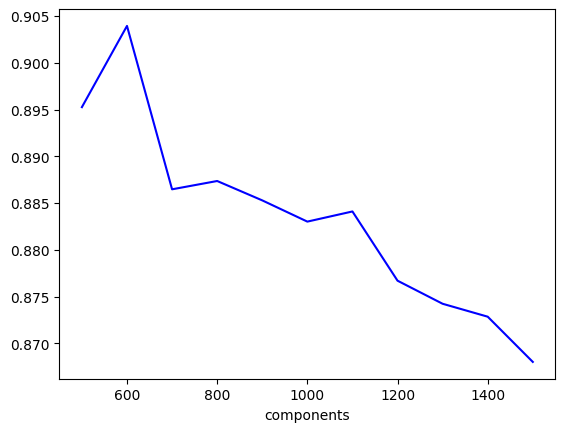

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=mean_df.index, y=mean_df.values, color='b')

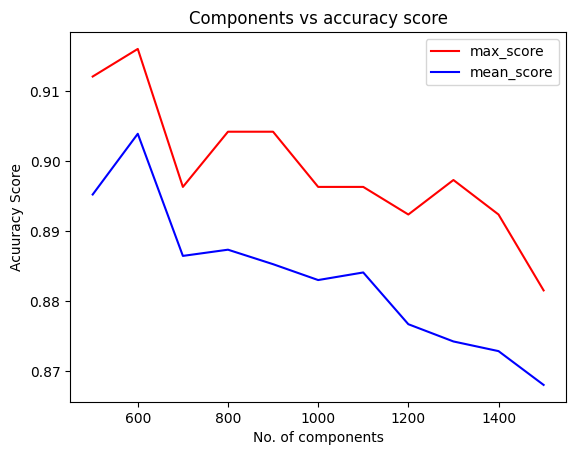

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=best_score_df['components'], y=best_score_df['max_accuracy'], color='r', label='max_score')
sns.lineplot(x=mean_df.index, y=mean_df.values, color='b', label='mean_score')
plt.legend()
plt.title("Components vs accuracy score")
plt.xlabel("No. of components")
plt.ylabel("Acuuracy Score")
plt.show()

In [18]:
best_score_df.to_csv("best_scores.csv")

In [132]:
x = np.random.randint(low=1, high=100, size=20)
y = np.random.randint(low=1, high=100, size=20)
dic = {'x':x, 'y':y}
pd.DataFrame(dic)
# index=list(range(len(x)))

,x,y
0,79,38
1,17,92
2,60,2
3,10,14
4,39,63
5,91,42
6,84,68
7,42,71
8,2,90
9,94,71


### first try with taking 500 top components

In [14]:
from sklearn.decomposition import PCA
pca_500d = PCA(n_components=500)

image_pca_500d = pca_500d.fit_transform(image_data)

In [15]:
image_pca_500d.shape

(5063, 500)

In [16]:
import numpy as np

np.cumsum(pca_500d.explained_variance_ratio_ * 100)[-1]

97.71394915978618

In [28]:
pca_1000d = PCA(n_components=1000)

image_pca_1000d = pca_1000d.fit_transform(image_data)

In [29]:
image_pca_1000d.shape

(5063, 1000)

<AxesSubplot: >

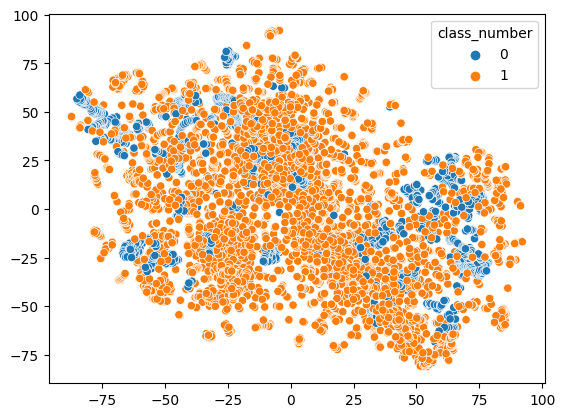

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 3, perplexity = 50, random_state=0, n_iter=5000)

image_tsne = tsne.fit_transform(image_data)

/home/nano-tech/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nano-tech/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [26]:
image_tsne[:,1]

array([-4.3969455 ,  1.5760689 ,  0.76250464, ..., 11.400457  ,
       10.138041  ,  7.4461412 ], dtype=float32)

In [33]:
image_tsne.shape

(5063, 3)

In [12]:
image_label

0       0
1       0
2       0
3       0
4       0
       ..
5058    1
5059    1
5060    1
5061    1
5062    1
Name: class_number, Length: 5063, dtype: int64

In [13]:
label = image_label.replace(0, "No")

In [14]:
label = label.replace(1, "Yes")

In [15]:
label.value_counts()

Yes    3594
No     1469
Name: class_number, dtype: int64

In [33]:
import plotly.express as px

fig = px.scatter_3d(x = image_tsne[:,0], y =image_tsne[:,1], z = image_tsne[:,2], color=label, size_max=0.001, opacity = 0.6)
# fig.update_traces(size = 5)
fig.show()

## model building

In [17]:
image_pca_500d.shape

(5063, 500)

In [18]:
from sklearn.model_selection import train_test_split
X_train_500d, X_test_500d, y_train_500d, y_test_500d = train_test_split(image_pca_500d, image_label, test_size = 0.2, random_state = 13)

In [19]:
X_train_500d.shape

(4050, 500)

In [20]:
X_test_500d.shape

(1013, 500)

### training the SVM model

In [21]:
from sklearn.svm import SVC

start = time()
svc500 = SVC()
svc500.fit(X_train_500d, y_train_500d)
end = time()
time_svc = end - start
print("time taken to train the model is {:.2f} seconds".format(time_svc))

time taken to train the model is 0.88 seconds


In [22]:
y_pred_svc500 = svc500.predict(X_test_500d)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_svc500 = accuracy_score(y_test_500d, y_pred_svc500)
print("Accuracy of SVC model is {:.2f} %".format(accuracy_svc500*100))

Accuracy of SVC model is 97.14 %


### training the Kmeans model

In [24]:
from sklearn.cluster import KMeans

start = time()
km500 = KMeans(n_clusters=2)
km500.fit(X_train_500d, y_train_500d)
end = time()
time_kmeans = end - start
print("time taken to train the model is {:.2f} seconds".format(time_kmeans))

time taken to train the model is 1.39 seconds


In [25]:
y_pred_km500 = km500.predict(X_test_500d)

In [26]:
accuracy_km500 = accuracy_score(y_test_500d, y_pred_km500)
print("Accuracy of KMeans model is {:.2f} %".format(accuracy_km500*100))

Accuracy of KMeans model is 44.82 %


### training the random forrest model

In [27]:
from sklearn.ensemble import RandomForestClassifier

start = time()
rf500 = RandomForestClassifier()
rf500.fit(X_train_500d, y_train_500d)
end = time()
time_rf500 = end - start
print("time taken to train the model is {:.2f} seconds".format(time_rf500))

time taken to train the model is 4.42 seconds


In [28]:
y_pred_rf500 = rf500.predict(X_test_500d)

In [29]:
accuracy_rf500 = accuracy_score(y_test_500d, y_pred_rf500)
print("Accuracy of Random Forrest model is {:.2f} %".format(accuracy_rf500*100))

Accuracy of Random Forrest model is 88.06 %


### training logistics regression model

In [30]:
from sklearn.linear_model import LogisticRegression

start = time()
lr500 = LogisticRegression(max_iter=500)
lr500.fit(X_train_500d, y_train_500d)
end = time()
time_lr500 = end - start
print("time taken to train the model is {:.2f} seconds".format(time_lr500))

time taken to train the model is 0.26 seconds


In [31]:
y_pred_lr500 = lr500.predict(X_test_500d)

In [32]:
accuracy_lr500 = accuracy_score(y_test_500d, y_pred_lr500)
print("Accuracy of Logistic Regression model is {:.2f} %".format(accuracy_lr500*100))

Accuracy of Logistic Regression model is 87.66 %


### plotting barplots for accuracy and time taken to train

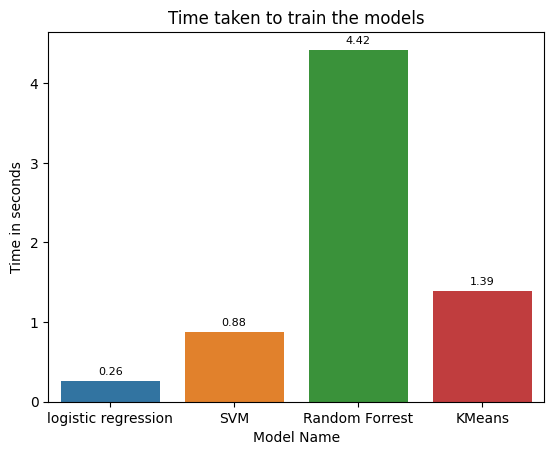

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x = ['logistic regression', 'SVM', 'Random Forrest', 'KMeans'], y = [round(time_lr500, 2), round(time_svc, 2), round(time_rf500,2), round(time_kmeans,2)])
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=3, fontsize=8)
plt.title("Time taken to train the models")
plt.xlabel("Model Name")
plt.ylabel("Time in seconds")
plt.show()

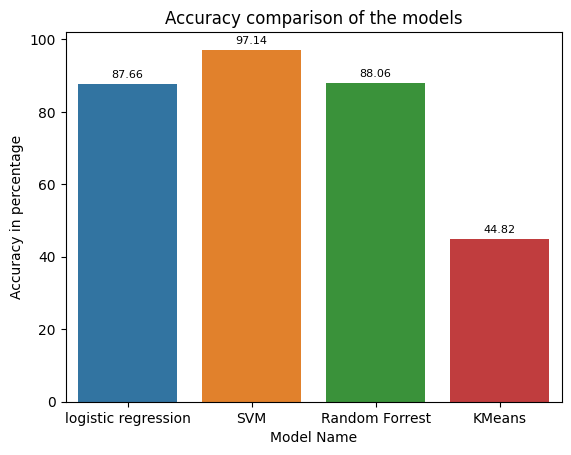

In [34]:
ax = sns.barplot(x = ['logistic regression', 'SVM', 'Random Forrest', 'KMeans'], y = [round(accuracy_lr500*100, 2), round(accuracy_svc500*100, 2), round(accuracy_rf500*100,2), round(accuracy_km500*100,2)])
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=3, fontsize=8)
plt.title("Accuracy comparison of the models")
plt.xlabel("Model Name")
plt.ylabel("Accuracy in percentage")
plt.show()

### doing cross validation

In [54]:
from sklearn.model_selection import cross_val_score

clf = SVC(kernel="rbf")
scores = cross_val_score(clf, image_pca_500d, image_label, cv=10)

In [55]:
scores

array([0.85798817, 0.80670611, 0.87179487, 0.91106719, 0.83992095,
       0.82213439, 0.88932806, 0.67588933, 0.75098814, 0.67588933])

In [51]:
scores.max()

0.7068114511352419

In [52]:
scores.mean()

0.6804283445641444

In [56]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, image_pca_500d, image_label, cv=10)

In [57]:
scores

array([0.78500986, 0.78106509, 0.82840237, 0.80237154, 0.756917  ,
       0.85770751, 0.73913043, 0.67786561, 0.71343874, 0.71146245])

In [40]:
scores.max()

0.7601184600197434

In [43]:
lr500 = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr500, image_pca_500d, image_label, cv=5)

In [45]:
scores

array([0.63178677, 0.83119447, 0.63277394, 0.69565217, 0.5583004 ])

### doing PCA separately for avoiding data leakage

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, image_label, test_size = 0.2, random_state = 13)

In [60]:
X_train.shape

(4050, 67600)

In [61]:
X_test.shape

(1013, 67600)

In [62]:
from sklearn.decomposition import PCA
pca500 = PCA(n_components=500)

train_500d = pca500.fit_transform(X_train)
test_500d = pca500.transform(X_test)

### model training

In [63]:
from sklearn.svm import SVC

start = time()
svc500 = SVC()
svc500.fit(train_500d, y_train)
end = time()
time_svc = end - start
print("time taken to train the model is {:.2f} seconds".format(time_svc))

time taken to train the model is 1.02 seconds


In [64]:
y_pred_svc500 = svc500.predict(test_500d)

In [65]:
from sklearn.metrics import accuracy_score

accuracy_svc500 = accuracy_score(y_test, y_pred_svc500)
print("Accuracy of SVC model is {:.2f} %".format(accuracy_svc500*100))

Accuracy of SVC model is 97.04 %


In [ ]:
from sklearn.model_selection import cross_val_score

clf = SVC(kernel="rbf")
scores = cross_val_score(clf, image_pca_500d, image_label, cv=5)

## for 1000 dimensions

In [31]:
X_train_1000d, X_test_1000d, y_train_1000d, y_test_1000d = train_test_split(image_pca_1000d, image_label, test_size = 0.2, random_state = 13)

In [32]:
X_train_1000d.shape

(4050, 1000)

In [33]:
km1000 = KMeans(n_clusters=2)
km1000.fit(X_train_1000d, y_train_1000d)

KMeans(n_clusters=2)

In [35]:
y_pred_1000d = km1000.predict(X_test_1000d)

In [39]:
from sklearn.metrics import accuracy_score, precision_score

In [40]:
accuracy1000 = accuracy_score(y_test_1000d, y_pred_1000d)
precision1000 = precision_score(y_test_1000d, y_pred_1000d)

In [37]:
print(accuracy1000)

0.5488647581441264


In [41]:
print(precision1000)

0.6593707250341997


In [2]:
accuracy_score

NameError: name 'accuracy_score' is not defined